Data source: http://data.insideairbnb.com/united-kingdom/england/greater-manchester/2021-10-24/data/listings.csv.gz
Skosnosc - skewness: https://www.naukowiec.org/wiedza/statystyka/skosnosc_714.html
- https://www.geeksforgeeks.org/scipy-stats-skew-python/ 
<br>Kurtoza (Miara koncetracji) - Kurtosis:
- https://www.naukowiec.org/wiedza/statystyka/kurtoza_698.html
<br><br>
Współczynnika korelacji rang Spearmana


- Correlation: https://en.wikipedia.org/wiki/Correlation
- Pearson Correlation: https://www.geeksforgeeks.org/python-pearson-correlation-test-between-two-variables/
- Covariance and Correlation: https://www.geeksforgeeks.org/mathematics-covariance-and-correlation/
- Data Visualization: https://www.geeksforgeeks.org/data-visualization-with-python/



# Place: Greater Manchester, England, United Kingdom 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option('display.max_columns', None) # all columns will be printed

In [2]:
data_url = 'http://data.insideairbnb.com/united-kingdom/england/greater-manchester/2021-10-24/data/listings.csv.gz'
dataset = pd.read_csv(data_url, index_col='id')

#### Quick review of the columns
- number of rows and columns
- columns names
- a type of data stored in the columns 
- number and percentage of missing values in each column
- after that, we decided to drop those columns that hold irrelevant information 

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3289 entries, 157612 to 52957618
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   3289 non-null   object 
 1   scrape_id                                     3289 non-null   int64  
 2   last_scraped                                  3289 non-null   object 
 3   name                                          3289 non-null   object 
 4   description                                   3175 non-null   object 
 5   neighborhood_overview                         1950 non-null   object 
 6   picture_url                                   3289 non-null   object 
 7   host_id                                       3289 non-null   int64  
 8   host_url                                      3289 non-null   object 
 9   host_name                                     3289 non

In [4]:
dataset.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',

In [5]:
# initializing new data frame that will be displayed in the table
data_review = pd.DataFrame(columns = ['Column','Data Type','Misssing Values', '[%] Missing Values', 'Sum Unique Val'])



# looping via columns and extracting needed information
for index, column in enumerate(dataset.columns):
    data_type = dataset.dtypes[column]
    missing_value = dataset[column].isnull().sum()
    percentage = round((missing_value/len(dataset))* 100,1) if (missing_value/len(dataset))* 100 else 0
    unique_val = len(dataset[column].unique())
    data_review.loc[index] = [column, data_type, missing_value,percentage,unique_val]
    
pd.set_option("max_rows", None) # all rows are shown when printing  
# pd.set_option("max_rows", 10) # 10 rows will be printed
    
data_review

,Column,Data Type,Misssing Values,[%] Missing Values,Sum Unique Val
0,listing_url,object,0,0,3289
1,scrape_id,int64,0,0,1
2,last_scraped,object,0,0,1
3,name,object,0,0,3192
4,description,object,114,3.5,2850
5,neighborhood_overview,object,1339,40.7,1588
6,picture_url,object,0,0,3168
7,host_id,int64,0,0,1638
8,host_url,object,0,0,1638
9,host_name,object,0,0,1064


We decided to drop some of the columns after the initial review of the dataset



In [6]:
# dropping columns from the dataframe 
# we consider this information as irrelevant
to_drop = ['last_scraped', 'host_url', 'listing_url', 'scrape_id', 'last_scraped', 'host_url', 'host_about','host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'bathrooms'
,'calendar_updated', 'calendar_last_scraped','license', 'neighbourhood','host_neighbourhood','neighborhood_overview','description']

dataset[to_drop].head(10)


,last_scraped,host_url,listing_url,scrape_id,last_scraped,host_url,host_about,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,bathrooms,calendar_updated,calendar_last_scraped,license,neighbourhood,host_neighbourhood,neighborhood_overview,description
id,,,,,,,,,,,,,,,,,,,
157612,2021-10-24,https://www.airbnb.com/users/show/757016,https://www.airbnb.com/rooms/157612,20211024155111,2021-10-24,https://www.airbnb.com/users/show/757016,Hi we are Tom and Margaret. Semi retired Engin...,https://a0.muscache.com/im/users/757016/profil...,https://a0.muscache.com/im/users/757016/profil...,3,3,NaN,NaN,2021-10-24,NaN,"Salford, United Kingdom",NaN,There is a public park within easy walking dis...,"The loft space is a small but cosy, private an..."
283495,2021-10-24,https://www.airbnb.com/users/show/1476718,https://www.airbnb.com/rooms/283495,20211024155111,2021-10-24,https://www.airbnb.com/users/show/1476718,NaN,https://a0.muscache.com/im/users/1476718/profi...,https://a0.muscache.com/im/users/1476718/profi...,1,1,NaN,NaN,2021-10-24,NaN,"Middleton, England, United Kingdom",NaN,The suburbaness of it all but 2 minutes from t...,<b>The space</b><br />Double bedroom with King...
299194,2021-10-24,https://www.airbnb.com/users/show/1542010,https://www.airbnb.com/rooms/299194,20211024155111,2021-10-24,https://www.airbnb.com/users/show/1542010,After decades of living and working in 4 conti...,https://a0.muscache.com/im/users/1542010/profi...,https://a0.muscache.com/im/users/1542010/profi...,1,1,NaN,NaN,2021-10-24,NaN,NaN,NaN,NaN,"We are In the edge of peak district , 3 miles ..."
310742,2021-10-24,https://www.airbnb.com/users/show/1603652,https://www.airbnb.com/rooms/310742,20211024155111,2021-10-24,https://www.airbnb.com/users/show/1603652,"Hi , I am a spanish girl who really likes bein...",https://a0.muscache.com/im/users/1603652/profi...,https://a0.muscache.com/im/users/1603652/profi...,1,1,NaN,NaN,2021-10-24,NaN,NaN,NaN,NaN,<b>The space</b><br />I am renting out my spar...
390028,2021-10-24,https://www.airbnb.com/users/show/1951261,https://www.airbnb.com/rooms/390028,20211024155111,2021-10-24,https://www.airbnb.com/users/show/1951261,Vegan family with a spare room. We enjoy quiet...,https://a0.muscache.com/im/users/1951261/profi...,https://a0.muscache.com/im/users/1951261/profi...,1,1,NaN,NaN,2021-10-24,NaN,"Stockport, Greater Manchster, United Kingdom",NaN,Cheadle is an old village which has become par...,<b>The space</b><br />Single bed in a large si...
411843,2021-10-24,https://www.airbnb.com/users/show/2046430,https://www.airbnb.com/rooms/411843,20211024155111,2021-10-24,https://www.airbnb.com/users/show/2046430,With over 9 years of experience with Airbnb an...,https://a0.muscache.com/im/users/2046430/profi...,https://a0.muscache.com/im/users/2046430/profi...,24,24,NaN,NaN,2021-10-24,NaN,"Manchester, United Kingdom",NaN,Manchester City Centre is on your doorstep - w...,"A spacious, modern 2-bed (Sleeps 6) apartment ..."
412687,2021-10-24,https://www.airbnb.com/users/show/2053716,https://www.airbnb.com/rooms/412687,20211024155111,2021-10-24,https://www.airbnb.com/users/show/2053716,We are a couple who have travelled extensively...,https://a0.muscache.com/im/users/2053716/profi...,https://a0.muscache.com/im/users/2053716/profi...,1,1,NaN,NaN,2021-10-24,NaN,NaN,NaN,NaN,A cosy well equipped one bedroom basement flat...
556920,2021-10-24,https://www.airbnb.com/users/show/2738322,https://www.airbnb.com/rooms/556920,20211024155111,2021-10-24,https://www.airbnb.com/users/show/2738322,NaN,https://a0.muscache.com/im/users/2738322/profi...,https://a0.muscache.com/im/users/2738322/profi...,1,1,NaN,NaN,2021-10-24,NaN,"Manchester, England, United Kingdom",NaN,New Islington has become a real neighbourhood ...,Great room in conveniently located character a...
568034,2021-10-24,https://www.airbnb.com/users/show/2794391,https://www.airbnb.com/rooms/568034,20211024155111,2021-10-24,https://www.airbnb.com/users/show/2794391,"Fr

In [7]:
dataset.drop(to_drop, axis=1, inplace=True)
dataset.shape

(3289, 56)

### Prices
What we did in here:
- removed the special signs from string data
- converted string to float number
- made sure that there are no null values
- identified places with min and max prices
- using quartiles and box-plot we identified the outliers and removed them from the dataframe

In [8]:
dataset.price.head()

id
157612    $41.00
283495    $60.00
299194    $50.00
310742    $34.00
390028    $36.00
Name: price, dtype: object

In [9]:
# we see that the column stores a mix of string and number data type - object
print(dataset.price.describe())

print('\n', dataset.price.dtype) # print data type of the column

count       3289
unique       338
top       $30.00
freq          86
Name: price, dtype: object

 object


Converting the price column into the numerical data type - integer

In [10]:
import re

# extracting float numbers from the string
dataset['price'] = dataset['price'].str.extract(r'(\d+.\d+)')

In [11]:
# checking all unique characters in the price column to avoid any errors when converting string to numerical type
unique_characters = set(dataset['price'].apply(list).sum())
print(unique_characters)

{'5', '3', '8', '9', '.', '0', '1', '6', '4', ',', '7', '2'}


In [12]:
# converting string to the float number
dataset['price'] = dataset['price'].apply(lambda x: x.replace(",", ""))
dataset['price'] = dataset['price'].astype(np.float64)

In [13]:
dataset['price'].describe()

count    3289.000000
mean      167.789602
std       306.365104
min        10.000000
25%        45.000000
50%        80.000000
75%       134.000000
max      5000.000000
Name: price, dtype: float64

In [14]:
# checking for number of null values
print(f"Number of rows with null values in the 'price' column:  {dataset['price'].isna().sum()} ")

Number of rows with null values in the 'price' column:  0 


Show basic info about places with the highest and lowest price 

In [15]:
# finds id of the place with the highest price
print('Id of the row with the max price: ',dataset['price'].argmax())
max_price_df = dataset.query('price == price.max()')

Id of the row with the max price:  526


In [16]:
info = ['price', 'neighbourhood_group_cleansed', 
        'property_type', 'room_type', 
        'accommodates', 'bathrooms_text', 
        'bedrooms', 'beds', 'amenities']

In [17]:
# finds id of the place with the lowest price
print('Id of the row with the min price: ',dataset['price'].argmin())
min_price_df = dataset.query('price == price.min()')

Id of the row with the min price:  2920


In [18]:
min_max = pd.concat([min_price_df[info], max_price_df[info]])
min_max

,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities
id,,,,,,,,,
51505109,10.0,Manchester,Entire place,Entire home/apt,1,0 baths,NaN,0.0,"[""Security cameras on property"", ""Paid parking..."
19246038,5000.0,Salford,Private room in rental unit,Private room,1,1 shared bath,1.0,1.0,"[""Cooking basics"", ""TV"", ""Lock on bedroom door..."


#### Finding and removing using box-plot  - PRICE column

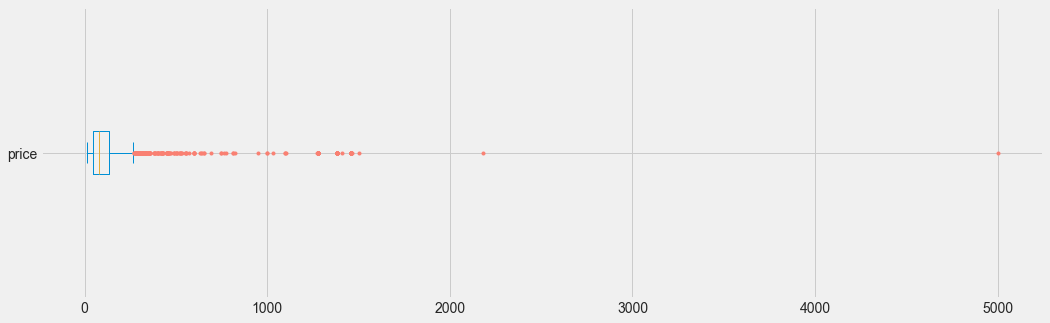

In [19]:
box = dict(markerfacecolor='#fa8072', markeredgecolor='#fa8072', marker='.')
dataset['price'].plot(kind='box', vert=False, flierprops=box, figsize=(16,5))

In [20]:
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR interquartile range 

dataset = dataset[(dataset['price'] >= Q1 - 1.5 * IQR) & (dataset['price'] <= Q3 + 1.5 *IQR)]

In [21]:
dataset.shape

(2972, 56)

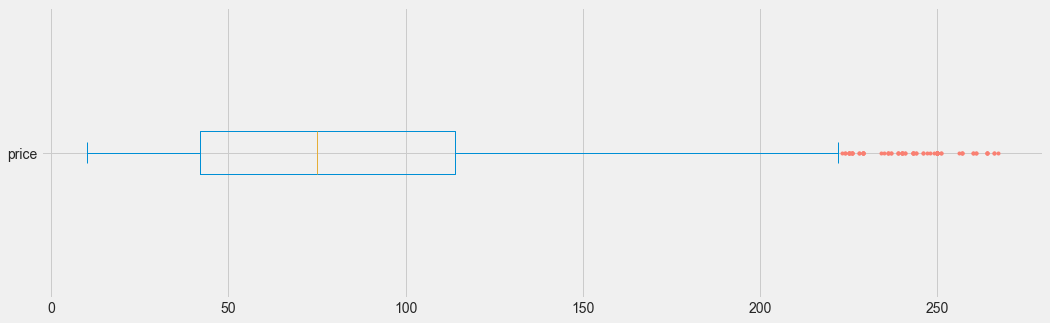

In [22]:
box = dict(markerfacecolor='#fa8072', markeredgecolor='#fa8072', marker='.')
dataset['price'].plot(kind='box', vert=False, flierprops=box, figsize=(16,5))

In [23]:
max_price_df = dataset.query('price == price.max()')
max_price_df[info]

,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities
id,,,,,,,,,
52182884,267.0,Oldham,Entire residential home,Entire home/apt,8,2 baths,4.0,6.0,"[""Kitchen"", ""Private entrance"", ""Dishes and si..."


### Beds

Cleaning data in beds included: 
- filling in null data with various of technics. Mainly it was based on values of related columns like accommodates, room_type & number of bedrooms
- we discovered that 0 beds don't mean that those AirBNB have no beds. It is considered by us as the mistakes in a data entry. We filled the missing values based on the following information: accommodates, room_type & number of bedrooms
- we did not remove any row with null values in the beds field

In [24]:
print( dataset['beds'].head() )
print( 'Is null', dataset['beds'].isnull().sum() )
print( dataset['beds'].value_counts().sort_index() )

id
157612    2.0
283495    1.0
299194    1.0
310742    1.0
390028    0.0
Name: beds, dtype: float64
Is null 41
0.0      144
1.0     1320
2.0      731
3.0      355
4.0      193
5.0       83
6.0       53
7.0       22
8.0       17
9.0        3
10.0       1
13.0       3
16.0       1
20.0       2
22.0       1
32.0       1
41.0       1
Name: beds, dtype: int64


We select rows with null values in the 'beds' column

In [25]:
# we select the rows with null values in 'beds'
no_beds = dataset[dataset['beds'].isnull()]
no_beds[info].head(10)

,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities
id,,,,,,,,,
1174058,66.0,Salford,Private room in rental unit,Private room,1,NaN,1.0,NaN,[]
16335410,45.0,Tameside,Private room in rental unit,Private room,1,NaN,1.0,NaN,[]
20844561,50.0,Salford,Private room in residential home,Private room,2,2.5 shared baths,1.0,NaN,"[""Dedicated workspace"", ""Cooking basics"", ""TV""..."
20845021,50.0,Salford,Private room in residential home,Private room,2,2.5 shared baths,1.0,NaN,"[""Dedicated workspace"", ""Cooking basics"", ""TV""..."
36512552,33.0,Manchester,Private room in residential home,Private room,2,2 baths,1.0,NaN,"[""Wifi"", ""Kitchen"", ""Dedicated workspace"", ""He..."
41285805,60.0,Salford,Private room in rental unit,Private room,2,1 bath,1.0,NaN,"[""Dedicated workspace"", ""Cooking basics"", ""TV""..."
42288613,35.0,Wigan,Private room in residential home,Private room,1,1 private bath,1.0,NaN,"[""Wifi"", ""Kitchen"", ""Dedicated workspace"", ""Lo..."
42420171,50.0,Manchester,Private room in residential home,Private room,2,1 shared bath,1.0,NaN,"[""Wifi"", ""Kitchen"", ""Long term stays allowed"",..."
42637162,23.0,Stockport,Private room in residential home,Private room,2,1 private bath,1.0,NaN,"[""Dedicated workspace"", ""Cooking basics"", ""Cof..."


In [26]:
# seems that it can be valid data just missing number of beds; lets check explor information about bedrooms 
no_beds['bedrooms'].value_counts().sort_index()

1.0    38
3.0     1
Name: bedrooms, dtype: int64

In [27]:
df = no_beds[no_beds['bedrooms']== 3.0]
df

,name,picture_url,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43767051,"Big spaces, close to tram stop,",https://a0.muscache.com/pictures/9326d88c-6938...,86393358,Kristina,2016-07-27,"Droylsden, England, United Kingdom",within a few hours,95%,54%,f,"['phone', 'facebook', 'offline_government_id',...",t,t,Tameside District,Tameside,53.47769,-2.16023,Private room in residential home,Private room,1,2.5 shared baths,3.0,NaN,"[""Dedicated workspace"", ""Cooking basics"", ""Out...",25.0,3,1125,3,3,1125,1125,3.0,1125.0,t,13,30,57,57,2,2,0,2021-02-09,2021-05-24,5.0,5.0,5.0,5.0,4.5,4.5,5.0,f,4,0,4,0,0.23


In [28]:
# we check the same for room type
no_beds['room_type'].value_counts().sort_index()

Entire home/apt     4
Private room       36
Shared room         1
Name: room_type, dtype: int64

In [29]:
# we decide to change null values to 1 for the places that have number 1 in 'bedrooms'
dataset['beds'] = np.where((dataset['beds'].isnull()) & (dataset['bedrooms'] == 1.0), 1.0, dataset['beds'])
no_beds = dataset[dataset['beds'].isnull()]
no_beds[info]

,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities
id,,,,,,,,,
43767051,25.0,Tameside,Private room in residential home,Private room,1,2.5 shared baths,3.0,NaN,"[""Dedicated workspace"", ""Cooking basics"", ""Out..."
45949443,35.0,Manchester,Entire rental unit,Entire home/apt,2,1 bath,NaN,NaN,"[""Wifi"", ""Kitchen"", ""Private entrance"", ""Dedic..."
52438752,81.0,Manchester,Entire condominium (condo),Entire home/apt,2,1 bath,NaN,NaN,"[""Dedicated workspace"", ""Clothing storage: clo..."


In [30]:
# after the review of the places that can accommodate 2 people we decided to set the number of beds for those places as 1
dataset['beds'] = np.where((dataset['beds'].isnull()) & (dataset['bedrooms'].isnull()), 1.0, dataset['beds'])

In [31]:
# displaying the place with 3 bedrooms that has null beds by its index value
dataset.loc[[43767051], info]

,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities
id,,,,,,,,,
43767051,25.0,Tameside,Private room in residential home,Private room,1,2.5 shared baths,3.0,NaN,"[""Dedicated workspace"", ""Cooking basics"", ""Out..."


In [32]:
# we see that the place accommodates only one person so we assign one bed to it
dataset['beds'] = np.where((dataset['beds'].isnull()) & (dataset['bedrooms'] == 3.0), 1.0, dataset['beds'])

In [33]:
# lets check the data again
dataset['beds'].value_counts().sort_index().rename_axis('unique_values').to_frame('counts')

,counts
unique_values,
0.0,144
1.0,1361
2.0,731
3.0,355
4.0,193
5.0,83
6.0,53
7.0,22
8.0,17


In [34]:
# let's explore the data with beds equal to 0
df = dataset[dataset['beds'] == 0.0]
df[info].head()

,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities
id,,,,,,,,,
390028,36.0,Stockport,Private room in residential home,Private room,1,1 private bath,1.0,0.0,"[""Wifi"", ""Dedicated workspace"", ""Long term sta..."
711323,33.0,Trafford,Private room in residential home,Private room,1,1 shared bath,1.0,0.0,"[""Wifi"", ""Kitchen"", ""Dishes and silverware"", ""..."
1162564,60.0,Manchester,Private room in residential home,Private room,2,1.5 shared baths,1.0,0.0,"[""Dedicated workspace"", ""Cooking basics"", ""Hai..."
1625515,15.0,Trafford,Private room in residential home,Private room,1,1.5 shared baths,1.0,0.0,"[""Wifi"", ""Kitchen"", ""Dedicated workspace"", ""Lo..."
2089150,68.0,Manchester,Entire loft,Entire home/apt,4,1 bath,2.0,0.0,"[""Dedicated workspace"", ""Cable TV"", ""Cooking b..."


In [35]:
# as we can see some of the places that are marked as 0, in reality, have beds
# let's check what room types those are 
df['room_type'].value_counts().sort_index().rename_axis('room_type').to_frame('counts')

,counts
room_type,
Entire home/apt,49
Private room,93
Shared room,2


In [36]:
# we decide to change places with 0 beds to 1 for those that have 'Shared room' in the 'room_type' column
dataset['beds'] = np.where((dataset['beds'] == 0.0) & (dataset['room_type'] == 'Shared room'), 1.0, dataset['beds'])

In [37]:
# let's check Private rooms with 0 beds
private = dataset[(dataset['beds'] == 0.0) & (dataset['room_type'] == 'Private room')]
print('# accommodates   ' , private.accommodates.describe())
print('# bedrooms   ' , private.bedrooms.describe())

# accommodates    count    93.000000
mean      1.849462
std       0.988480
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       5.000000
Name: accommodates, dtype: float64
# bedrooms    count    82.000000
mean      1.146341
std       0.547090
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       4.000000
Name: bedrooms, dtype: float64


In [38]:
# we decide to set 'beds' to 1 for the places where bedrooms equals 1
dataset['beds'] = np.where((dataset['beds'] == 0.0) & (dataset['bedrooms'] == 1.0), 1.0, dataset['beds'])

In [39]:
private = dataset[(dataset['beds'] == 0.0) & (dataset['room_type'] == 'Private room')]
print('Number of rooms still left with 0 beds marked as private',private.shape)
private[info].head(private.shape[0])

Number of rooms still left with 0 beds marked as private (18, 56)


,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities
id,,,,,,,,,
18444264,15.0,Manchester,Private room in residential home,Private room,3,3 shared baths,NaN,0.0,"[""Wifi"", ""Kitchen"", ""Dedicated workspace"", ""Lo..."
19021973,26.0,Wigan,Private room in residential home,Private room,1,1 shared bath,NaN,0.0,"[""Wifi"", ""Kitchen"", ""Long term stays allowed"",..."
24646469,52.0,Manchester,Private room in bed and breakfast,Private room,2,1.5 shared baths,NaN,0.0,"[""Dedicated workspace"", ""Long term stays allow..."
24646516,79.0,Manchester,Private room in bed and breakfast,Private room,4,1.5 baths,NaN,0.0,"[""Dedicated workspace"", ""Long term stays allow..."
29476409,81.0,Manchester,Private room in guesthouse,Private room,3,0 baths,NaN,0.0,"[""Dedicated workspace"", ""Long term stays allow..."
29477377,52.0,Manchester,Private room in guesthouse,Private room,2,1 bath,NaN,0.0,"[""Dedicated workspace"", ""Long term stays allow..."
29477540,52.0,Manchester,Private room in guesthouse,Private room,2,1.5 baths,NaN,0.0,"[""Dedicated workspace"", ""Long term stays allow..."
29510041,52.0,Manchester,Private room in guesthouse,Private room,2,2 baths,NaN,0.0,"[""Dedicated workspace"", ""Long term stays allow..."
35673861,25.0,Trafford,Private room in guest suite,Private room,1,1 shared bath,NaN,0.0,"[""Cooking basics"", ""BBQ grill"", ""Hair dryer"", ..."


In [40]:
# accomodates with 1 we change the number of beds to 1
dataset['beds'] = np.where((dataset['beds'] == 0.0) & (dataset['accommodates'] == 1.0), 1.0, dataset['beds'])

In [41]:
# the rest of the Private rooms that accommodate more than one person - we assume one bed for 2 people 
# in case of an odd number of people  (like 3) we decide to round the number up to an even number and divide it by 2 people=>
# 4/2 = 2 beds

def give_beds(row):
    if row['beds'] == 0.0 and row['room_type'] == 'Private room':
        if row['accommodates'] % 2 == 0:
            return row['accommodates']/2
        else:
            return (row['accommodates'] + 1) / 2
    return row['beds']
        
    
dataset['beds'] = dataset.apply(give_beds, axis=1)

In [42]:
# checking places with 0 beds marked as Entire home/apt	
df = dataset[dataset['beds'] == 0.0]
df['room_type'].value_counts().sort_index().rename_axis('room_type').to_frame('counts')

,counts
room_type,
Entire home/apt,21


In [43]:
entire = dataset[(dataset['beds'] == 0.0) & (dataset['room_type'] == 'Entire home/apt')]
print('Number of rooms still left with 0 beds marked as private',private.shape)
entire[info].head(entire.shape[0])

Number of rooms still left with 0 beds marked as private (18, 56)


,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities
id,,,,,,,,,
2089150,68.0,Manchester,Entire loft,Entire home/apt,4,1 bath,2.0,0.0,"[""Dedicated workspace"", ""Cable TV"", ""Cooking b..."
3084464,68.0,Manchester,Entire loft,Entire home/apt,4,1 bath,2.0,0.0,"[""Dedicated workspace"", ""Cooking basics"", ""Cof..."
7408693,250.0,Manchester,Entire residential home,Entire home/apt,4,1 bath,2.0,0.0,"[""Wifi"", ""Kitchen"", ""Dedicated workspace"", ""Lo..."
8029827,95.0,Oldham,Entire bungalow,Entire home/apt,4,1 bath,2.0,0.0,"[""Dedicated workspace"", ""Cooking basics"", ""TV""..."
16409055,80.0,Manchester,Entire condominium (condo),Entire home/apt,4,1 bath,2.0,0.0,"[""Cooking basics"", ""TV"", ""Hair dryer"", ""Indoor..."
26520342,52.0,Salford,Entire rental unit,Entire home/apt,2,1 bath,NaN,0.0,"[""Dedicated workspace"", ""Cooking basics"", ""TV""..."
34069257,72.0,Manchester,Entire rental unit,Entire home/apt,4,1 bath,2.0,0.0,"[""Dedicated workspace"", ""Cable TV"", ""Cooking b..."
42135440,150.0,Manchester,Entire residential home,Entire home/apt,4,1.5 baths,4.0,0.0,"[""Air conditioning"", ""Dedicated workspace"", ""C..."
44020111,130.0,Salford,Entire residential home,Entire home/apt,8,1.5 baths,3.0,0.0,"[""Wifi"", ""Kitchen"", ""Private entrance"", ""Dedic..."


In [44]:
# after the revision we decided to fill number of beds using the same approach as we did private rooms - using odd and even numbers

In [45]:
def give_beds(row):
    if row['beds'] == 0.0 and row['room_type'] == 'Entire home/apt':
        if row['accommodates'] % 2 == 0:
            return row['accommodates']/2
        else:
            return (row['accommodates'] + 1) / 2
    return row['beds']
        
    
dataset['beds'] = dataset.apply(give_beds, axis=1)

In [46]:
# lets check the data again
dataset['beds'].value_counts().sort_index().rename_axis('unique_values').to_frame('counts')

,counts
unique_values,
1.0,1479
2.0,750
3.0,359
4.0,195
5.0,84
6.0,53
7.0,22
8.0,17
9.0,3


### Bedrooms

Done in this section:
- we checked the number of rows with missing data in the 'bedrooms' field
- we selected data with missing information for the number of bedrooms
- we checked what data is stored in columns we consider relevant in the identification of bedroom numbers for the selected rows: 'beds', 'room_type'
- we checked the places with the highest number of beds
- having in mind all the above,  we replaced the missing values in the bedrooms column as follows:
    - for 'private rooms' with one bed we assigned one bedroom
    - for 'private rooms' accomodating from 3 to 4 people we decided to assign 2 bedrooms 
    - the places classified as 'Entire home/apt ' - for those we grouped by their accommodates and based on the median bedrooms of Airbnbs accommodating the same number of people, we filled missing values in bedrooms fields 

In [47]:
print( dataset['bedrooms'].head(3) )
print( '\nIs null', dataset['bedrooms'].isnull().sum() )
print( dataset["bedrooms"].value_counts().sort_index() )

id
157612    2.0
283495    1.0
299194    1.0
Name: bedrooms, dtype: float64

Is null 131
1.0     1704
2.0      753
3.0      254
4.0       82
5.0       27
6.0       14
7.0        2
8.0        1
9.0        1
10.0       1
22.0       1
26.0       1
Name: bedrooms, dtype: int64


In [48]:
no_data = dataset[dataset.bedrooms.isnull()]

In [49]:
no_data[info].head()

,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities
id,,,,,,,,,
3588495,61.0,Trafford,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Cooking basics"", ""Coffee maker"", ""Outdoor di..."
6550407,39.0,Bury,Entire guesthouse,Entire home/apt,2,1 bath,NaN,1.0,"[""Dedicated workspace"", ""Cooking basics"", ""Bre..."
7719803,90.0,Wigan,Entire loft,Entire home/apt,3,1 bath,NaN,1.0,"[""Cooking basics"", ""TV"", ""Hair dryer"", ""Refrig..."
13838623,27.0,Trafford,Private room in residential home,Private room,1,1 shared bath,NaN,1.0,"[""Coffee maker"", ""TV"", ""Hair dryer"", ""Dryer"", ..."
16182929,111.0,Salford,Entire serviced apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Air conditioning"", ""Dedicated workspace"", ""C..."


In [50]:
no_data['beds'].value_counts().sort_index()

1.0    106
2.0     22
3.0      2
5.0      1
Name: beds, dtype: int64

In [51]:
no_data["room_type"].value_counts().sort_index()

Entire home/apt    82
Private room       49
Name: room_type, dtype: int64

In [52]:
no_data["accommodates"].value_counts().sort_index()

1    22
2    82
3     9
4    15
6     3
Name: accommodates, dtype: int64

In [53]:
# selecting private rooms with null bedrooms
no_data_private = no_data[no_data.room_type == 'Private room']
print(f'We have {no_data_private.shape} places marked as private room without given number of bedrooms')

print('\n',no_data_private["accommodates"].value_counts().sort_index().rename_axis('Accomodates').to_frame('counts'))
print('\n',no_data_private["beds"].value_counts().sort_index().rename_axis('Beds').to_frame('counts'))

no_data_private[info]

We have (49, 56) places marked as private room without given number of bedrooms

              counts
Accomodates        
1                17
2                22
3                 2
4                 8

       counts
Beds        
1.0       39
2.0       10


,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities
id,,,,,,,,,
13838623,27.0,Trafford,Private room in residential home,Private room,1,1 shared bath,NaN,1.0,"[""Coffee maker"", ""TV"", ""Hair dryer"", ""Dryer"", ..."
18070300,75.0,Manchester,Private room in guesthouse,Private room,1,1 shared bath,NaN,1.0,"[""Wifi"", ""Kitchen"", ""Dedicated workspace"", ""Fr..."
18444264,15.0,Manchester,Private room in residential home,Private room,3,3 shared baths,NaN,2.0,"[""Wifi"", ""Kitchen"", ""Dedicated workspace"", ""Lo..."
19021973,26.0,Wigan,Private room in residential home,Private room,1,1 shared bath,NaN,1.0,"[""Wifi"", ""Kitchen"", ""Long term stays allowed"",..."
19724942,18.0,Bolton,Private room in bungalow,Private room,1,1.5 shared baths,NaN,1.0,"[""Wifi"", ""Kitchen"", ""Dishes and silverware"", ""..."
21396852,200.0,Trafford,Private room in residential home,Private room,2,1 shared bath,NaN,2.0,"[""Wifi"", ""Dishes and silverware"", ""Dedicated w..."
22551754,40.0,Tameside,Private room in residential home,Private room,2,1 private bath,NaN,1.0,"[""Wifi"", ""Kitchen"", ""Dishes and silverware"", ""..."
24646469,52.0,Manchester,Private room in bed and breakfast,Private room,2,1.5 shared baths,NaN,1.0,"[""Dedicated workspace"", ""Long term stays allow..."
24646516,79.0,Manchester,Private room in bed and breakfast,Private room,4,1.5 baths,NaN,2.0,"[""Dedicated workspace"", ""Long term stays allow..."


In [54]:
# private rooms with one bed we decided - we populate missing values with one bedroom 
condition1 = (dataset["room_type"] == 'Private room')
condition2 = (dataset.bedrooms.isnull())
condition3 = (dataset.beds == 1)
dataset.bedrooms = np.where((dataset["room_type"] == 'Private room') & (dataset.bedrooms.isnull()) & (dataset.beds == 1), dataset.bedrooms.fillna(1.0), dataset.bedrooms)

In [55]:
# again selecting private rooms with null number of bedrooms 
no_data_private = dataset[(dataset["room_type"] == 'Private room') & (dataset.bedrooms.isnull())]
print(f'We have {no_data_private.shape} places marked as private room without given number of bedrooms')

print('\n',no_data_private["accommodates"].value_counts().sort_index().rename_axis('Accomodates').to_frame('counts'))
print('\n',no_data_private["beds"].value_counts().sort_index().rename_axis('Beds').to_frame('counts'))

no_data_private[info]

We have (10, 56) places marked as private room without given number of bedrooms

              counts
Accomodates        
2                 2
3                 2
4                 6

       counts
Beds        
2.0       10


,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities
id,,,,,,,,,
18444264,15.0,Manchester,Private room in residential home,Private room,3,3 shared baths,NaN,2.0,"[""Wifi"", ""Kitchen"", ""Dedicated workspace"", ""Lo..."
21396852,200.0,Trafford,Private room in residential home,Private room,2,1 shared bath,NaN,2.0,"[""Wifi"", ""Dishes and silverware"", ""Dedicated w..."
24646516,79.0,Manchester,Private room in bed and breakfast,Private room,4,1.5 baths,NaN,2.0,"[""Dedicated workspace"", ""Long term stays allow..."
26688458,60.0,Bolton,Private room in residential home,Private room,2,NaN,NaN,2.0,"[""Wifi"", ""Kitchen"", ""Dedicated workspace"", ""Lo..."
29476409,81.0,Manchester,Private room in guesthouse,Private room,3,0 baths,NaN,2.0,"[""Dedicated workspace"", ""Long term stays allow..."
29737667,200.0,Bury,Private room in campsite,Private room,4,1 bath,NaN,2.0,"[""Long term stays allowed""]"
29737768,200.0,Bury,Private room in campsite,Private room,4,1 bath,NaN,2.0,"[""Long term stays allowed""]"
29737849,200.0,Bury,Private room in campsite,Private room,4,1 bath,NaN,2.0,"[""Long term stays allowed""]"
34699359,150.0,Bury,Private room in campsite,Private room,4,1 bath,NaN,2.0,"[""Long term stays allowed""]"


In [56]:
# we see that the remaining rooms with null bedrooms accommodate max of 4 people; we decided to assign 2 bedrooms for each of the places
dataset.bedrooms = np.where((dataset["room_type"] == 'Private room') & (dataset.bedrooms.isnull()), dataset.bedrooms.fillna(2.0), dataset.bedrooms)

In [57]:
no_data = dataset[dataset.bedrooms.isnull()]
print(no_data.shape)
print('\n',no_data["accommodates"].value_counts().sort_index().rename_axis('Accomodates').to_frame('counts'))
print('\n',no_data["beds"].value_counts().sort_index().rename_axis('Beds').to_frame('counts'))
print('\n',no_data["room_type"].value_counts().sort_index().rename_axis('room_type').to_frame('counts'))

no_data[info]

(82, 56)

              counts
Accomodates        
1                 5
2                60
3                 7
4                 7
6                 3

       counts
Beds        
1.0       67
2.0       12
3.0        2
5.0        1

                  counts
room_type              
Entire home/apt      82


,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities
id,,,,,,,,,
3588495,61.0,Trafford,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Cooking basics"", ""Coffee maker"", ""Outdoor di..."
6550407,39.0,Bury,Entire guesthouse,Entire home/apt,2,1 bath,NaN,1.0,"[""Dedicated workspace"", ""Cooking basics"", ""Bre..."
7719803,90.0,Wigan,Entire loft,Entire home/apt,3,1 bath,NaN,1.0,"[""Cooking basics"", ""TV"", ""Hair dryer"", ""Refrig..."
16182929,111.0,Salford,Entire serviced apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Air conditioning"", ""Dedicated workspace"", ""C..."
18763604,30.0,Manchester,Entire guest suite,Entire home/apt,1,1 bath,NaN,1.0,"[""Dedicated workspace"", ""Hair dryer"", ""Luggage..."
20090942,59.0,Manchester,Entire guesthouse,Entire home/apt,4,1 bath,NaN,2.0,"[""Dedicated workspace"", ""Cooking basics"", ""Chi..."
22824209,65.0,Trafford,Entire guesthouse,Entire home/apt,4,1 bath,NaN,1.0,"[""Dedicated workspace"", ""Cable TV"", ""Babysitte..."
23457448,40.0,Stockport,Entire bungalow,Entire home/apt,2,1 bath,NaN,1.0,"[""Wifi \u2013 104 Mbps"", ""Dedicated workspace""..."
24144685,84.0,Manchester,Entire residential home,Entire home/apt,6,1 bath,NaN,3.0,"[""Wifi"", ""Kitchen"", ""Long term stays allowed"",..."


In [58]:
# places marked as 'Entire home/apt' accomodating max 2 people we considered as 1 bedroom 
dataset.bedrooms = np.where((dataset['accommodates'] <=2.0) & (dataset.bedrooms.isnull()), dataset.bedrooms.fillna(1.0), dataset.bedrooms )

In [59]:
no_data = dataset[dataset.bedrooms.isnull()]
print(no_data.shape)
print('\n',no_data["accommodates"].value_counts().sort_index().rename_axis('Accomodates').to_frame('counts'))
print('\n',no_data["beds"].value_counts().sort_index().rename_axis('Beds').to_frame('counts'))
print('\n',no_data["room_type"].value_counts().sort_index().rename_axis('room_type').to_frame('counts'))


(17, 56)

              counts
Accomodates        
3                 7
4                 7
6                 3

       counts
Beds        
1.0        5
2.0        9
3.0        2
5.0        1

                  counts
room_type              
Entire home/apt      17


In [60]:
# based on the 'accommodates' values; we decided to find median of the places accommodating the same number of people that are marked as 'Entire home/apt'
# and replace the missing values with the medians

# converting accommodates to the list
accommodates_no = list(dict(no_data['accommodates'].value_counts()))
print(accommodates_no,'\n')

# knowing that our lists consists of 3 instances we did in the loop
for i in accommodates_no:
    print(f'For places that are rented as "Entire home/apt" accommodating {i} people - the median of bedroom equals ',end ="")
    df = dataset[(dataset['room_type'] == 'Entire home/apt')& (dataset['accommodates'] == i)]
    # for each instance we found median
    median = df['bedrooms'].describe()[5]
    print(median)
    # we used the median to populate missing values for each of the instances
    dataset.bedrooms = np.where((dataset['accommodates'] == i) & (dataset.bedrooms.isnull()), median, dataset.bedrooms )

[3, 4, 6] 

For places that are rented as "Entire home/apt" accommodating 3 people - the median of bedroom equals 1.0
For places that are rented as "Entire home/apt" accommodating 4 people - the median of bedroom equals 2.0
For places that are rented as "Entire home/apt" accommodating 6 people - the median of bedroom equals 2.0


### Bathrooms
Cleaning the data stored in the 'bathrooms_text' consisted of:
- dropping the rows with null values. Those were only 0.2% of total data
- extracting the numerical values from the string information and we created a new column called 'bathrooms'
- replacing values containing 'half' with 0.5 

In [61]:
null = dataset['bathrooms_text'].isnull().sum()
total = dataset.shape[0]
pre = (null/total) * 100
print('Null values: ', null)

print('Percentage of missing data: ', pre )


Null values:  6
Percentage of missing data:  0.2018842530282638


In [62]:
# we remove rows without inforamtion about bathrooms
dataset = dataset[dataset.bathrooms_text.notnull()]

In [63]:
df = dataset["bathrooms_text"].value_counts().sort_index().rename_axis('bathrooms_text').to_frame('counts')
df

,counts
bathrooms_text,
0 baths,9
0 shared baths,8
1 bath,1109
1 private bath,235
1 shared bath,455
1.5 baths,271
1.5 shared baths,188
2 baths,378
2 shared baths,68


In [64]:
dataset['bathrooms_text'].describe()

count       2966
unique        28
top       1 bath
freq        1109
Name: bathrooms_text, dtype: object

In [65]:
dataset['bathrooms_text'] = dataset['bathrooms_text'].str.lower()
dataset.bathrooms_text.unique()

array(['1 bath', '1 private bath', '1.5 baths', '1 shared bath',
       '3 baths', '2 shared baths', '1.5 shared baths', '2 baths',
       'shared half-bath', '2.5 baths', '3.5 baths', 'half-bath',
       '6 baths', '2.5 shared baths', '0 baths', '3 shared baths',
       '4 baths', 'private half-bath', '3.5 shared baths',
       '5 shared baths', '8 shared baths', '4 shared baths',
       '0 shared baths', '4.5 baths', '7.5 baths', '7.5 shared baths',
       '27 shared baths', '5 baths'], dtype=object)

In [66]:
dataset['bathrooms'] = np.where(dataset['bathrooms_text'].str.lower().str.contains('half'), 0.5, dataset['bathrooms_text'].str.split().str[0]).astype(np.float64)

index = info.index("bathrooms_text")
info[index] = 'bathrooms'

dataset["bathrooms"].value_counts().sort_index().rename_axis('bathrooms').to_frame('counts')

,counts
bathrooms,
0.0,17
0.5,27
1.0,1799
1.5,459
2.0,446
2.5,116
3.0,66
3.5,14
4.0,11


## Host columns

### host_verifications
Done: 
- we created a new column with named 'no_verifications' for storing the number of verification methods used by host. 
- we checked which methods are the most popular
- we checked the corelation between the verifications of hosts and the prices for AirBnB using One-Hot Encoding & Pearson Correlation 'heatmap'


In [67]:
df = dataset[['host_verifications'] + info].head(3)
df

,host_verifications,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities
id,,,,,,,,,,
157612,"['email', 'phone', 'reviews']",41.0,Salford,Entire loft,Entire home/apt,3,1.0,2.0,2.0,"[""Dedicated workspace"", ""Cooking basics"", ""Pri..."
283495,"['email', 'phone', 'reviews']",60.0,Rochdale,Private room in residential home,Private room,2,1.0,1.0,1.0,"[""Dedicated workspace"", ""Cable TV"", ""Breakfast..."
299194,"['email', 'phone', 'reviews', 'offline_governm...",50.0,Stockport,Entire chalet,Entire home/apt,4,1.5,1.0,1.0,"[""TV"", ""BBQ grill"", ""Hair dryer"", ""Dryer"", ""Re..."


In [68]:
# checking all unique means of verification listed in the column
from collections import Counter

results = Counter()

counted = dataset['host_verifications'].str.strip('[]')\
                .str.replace("'", '')\
                .str.replace(" ", '')\
               .str.split(',')\
               .apply(results.update)

In [69]:
list_all_verifications = list(results)
print(f'In the dataset we have {len(list_all_verifications)} different types of verification means\n', list(results))

In the dataset we have 18 different types of verification means
 ['email', 'phone', 'reviews', 'offline_government_id', 'facebook', 'jumio', 'government_id', 'selfie', 'identity_manual', 'work_email', 'google', 'manual_online', 'manual_offline', 'sent_id', 'weibo', '', 'zhima_selfie', 'kba']


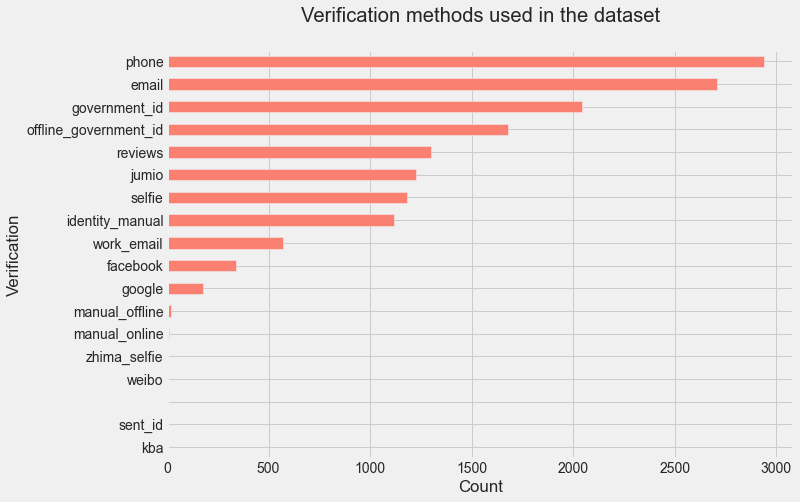

In [70]:
# create a new dataframe
sub_df = pd.DataFrame(results.most_common(), columns=['Verification', 'count'])
# plot the Top 30
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='Verification', y='count',  
                                                      figsize=(10,7), legend=False, color='salmon',
                                                      title='Verification methods used in the dataset\n')
plt.xlabel('Count');

In [71]:
# creating a new column with the number of verification methods 
dataset['no_verifications'] = dataset['host_verifications'].str.strip('[]')\
                .str.replace("'", '')\
                .str.replace(" ", '')\
                .str.split(',')\
                .str.len()

In [72]:
df = dataset[['host_verifications','no_verifications' ] + ['price']]
df.head(5)

,host_verifications,no_verifications,price
id,,,
157612,"['email', 'phone', 'reviews']",3,41.0
283495,"['email', 'phone', 'reviews']",3,60.0
299194,"['email', 'phone', 'reviews', 'offline_governm...",4,50.0
310742,"['email', 'phone', 'facebook', 'reviews', 'jum...",6,34.0
390028,"['email', 'phone', 'reviews', 'jumio', 'govern...",5,36.0


In [73]:
df['host_verifications'] = df['host_verifications'].str.strip('[]')\
                .str.replace("'", '')\
                .str.replace(" ", '')\
                .str.split(',')

C:\Users\Ukasz\Anaconda3\envs\geopandas\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [74]:
# One-Hot Encoding [One Hot Encoding]
one_hot = df['host_verifications'].str.join('|').str.get_dummies()
one_hot.head(2)

,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie
id,,,,,,,,,,,,,,,,,
157612,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
283495,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [75]:
df = pd.concat([df, one_hot], axis=1)
df.drop(['host_verifications'], axis=1, inplace=True)
df.head(2)

,no_verifications,price,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie
id,,,,,,,,,,,,,,,,,,,
157612,3,41.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
283495,3,60.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


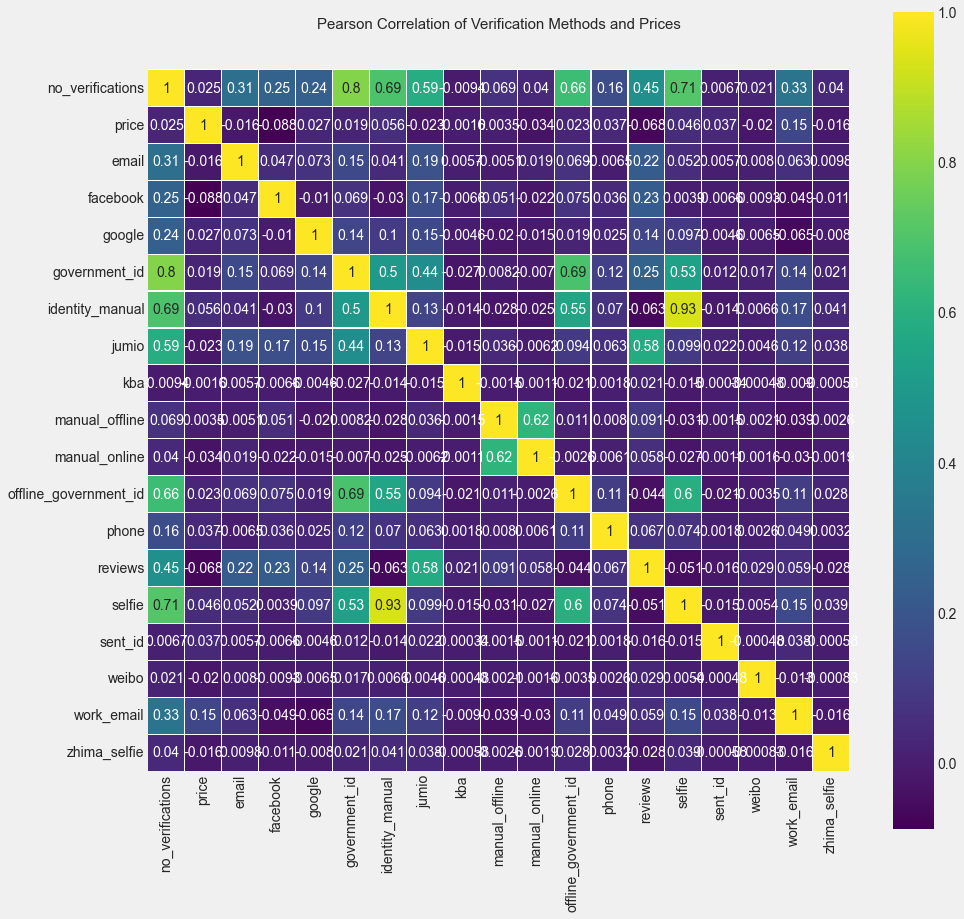

In [76]:
heatmap = plt.cm.viridis
plt.figure(figsize=(14,14))
plt.title('Pearson Correlation of Verification Methods and Prices', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=heatmap, linecolor='white', annot=True)
plt.show()

What the above means? - there is **no correlation between prices and verification methods** 
<br>Understanding Pearson Correlation between values:
- value between -1 (negative correlation) and 1 (positive correlation)
- 0 means no correlation


### host_since

In [77]:
# checking the type of data stored in the column
print(dataset['host_since'].dtypes)
dataset['host_since'].head()

object


id
157612    2011-06-29
283495    2011-12-06
299194    2011-12-28
310742    2012-01-13
390028    2012-03-18
Name: host_since, dtype: object

In [78]:
# converting the string column to datetime format
dataset['host_since'] = dataset['host_since'].apply(pd.to_datetime)

In [79]:
print(dataset['host_since'].dtypes)

datetime64[ns]


In [80]:
# we group dataste by the year and we create a new dataframe
df = dataset.groupby(dataset.host_since.dt.year).size().reset_index()
df.columns = ['year', 'new_joiners']
df

,year,new_joiners
0,2010,1
1,2011,27
2,2012,114
3,2013,149
4,2014,229
5,2015,332
6,2016,465
7,2017,338
8,2018,393
9,2019,463


In [81]:
# checking entry airbnb from 2010 
from_2010 = dataset[dataset['host_since'].dt.year == 2010]
from_2010

,name,picture_url,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms,no_verifications
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49052365,Light double bedroom next to Heaton park and tram,https://a0.muscache.com/pictures/fee6654c-2ab1...,235303,Tom,2010-09-15,"Manchester, England, United Kingdom",within an hour,100%,71%,f,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,Bury District,Bury,53.53072,-2.27262,Private room in residential home,Private room,2,1 shared bath,1.0,1.0,"[""Wifi"", ""Long term stays allowed"", ""Coffee ma...",37.0,2,365,2,2,365,365,2.0,365.0,t,8,38,68,153,6,6,1,2021-05-01,2021-10-19,5.0,5.0,5.0,5.0,5.0,5.0,5.0,f,1,0,1,0,1.02,1.0,8


In [82]:
# the strange thing in here is that the all reviews are from 2021 
# checking how it looks with the airbnbs from 2011
from_2011 = dataset[dataset['host_since'].dt.year == 2011]
from_2011

,name,picture_url,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms,no_verifications
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
157612,New attic space/single & Dble room,https://a0.muscache.com/pictures/18150846/8cf7...,757016,Margaret,2011-06-29,"Salford, England, United Kingdom",within a few hours,100%,67%,f,"['email', 'phone', 'reviews']",t,f,Salford District,Salford,53.50114,-2.26429,Entire loft,Entire home/apt,3,1 bath,2.0,2.0,"[""Dedicated workspace"", ""Cooking basics"", ""Pri...",41.0,2,365,2,2,365,365,2.0,365.0,t,15,15,34,298,96,0,0,2016-07-25,2019-12-08,4.90,4.91,4.91,4.98,4.92,4.62,4.90,f,1,1,0,0,1.50,1.0,3
283495,En-suite room in detached house,https://a0.muscache.com/pictures/78775473/2d8f...,1476718,Alison,2011-12-06,"Manchester, England, United Kingdom",NaN,NaN,NaN,f,"['email', 'phone', 'reviews']",t,f,Rochdale District,Rochdale,53.56259,-2.21945,Private room in residential home,Private room,2,1 private bath,1.0,1.0,"[""Dedicated workspace"", ""Cable TV"", ""Breakfast...",60.0,3,1125,3,3,1125,1125,3.0,1125.0,t,3,33,63,338,10,0,0,2015-04-26,2018-08-05,5.00,5.00,4.90,5.00,5.00,4.80,5.00,f,1,0,1,0,0.13,1.0,3
299194,Cosy Garden Chalet for all seasons,https://a0.muscache.com/pictures/45214400/4de0...,1542010,Minh,2011-12-28,"England, United Kingdom",within an hour,100%,100%,f,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Stockport District,Stockport,53.37600,-2.04462,Entire chalet,Entire home/apt,4,1.5 baths,1.0,1.0,"[""TV"", ""BBQ grill"", ""Hair dryer"", ""Dryer"", ""Re...",50.0,2,180,2,2,1125,1125,2.0,1125.0,t,20,50,80,349,291,24,1,2017-08-12,2021-09-05,4.53,4.68,4.56,4.82,4.86,4.72,4.60,t,1,1,0,0,5.69,1.5,4
725938,"Stylish Apt for 2, West Didsbury Near Burton R...",https://a0.muscache.com/pictures/f69d7b96-bee4...,1388085,Gary & Dinah,2011-11-09,"Manchester, England, United Kingdom",within an hour,100%,98%,f,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Old Moat,Manchester,53.43111,-2.23855,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Cooking basics"", ""Cof...",72.0,2,89,1,2,1125,1125,1.9,1125.0,t,0,0,17,17,235,35,5,2014-10-05,2020-10-24,4.79,4.74,4.85,4.91,4.88,4.80,4.70,f,1,1,0,0,2.74,1.0,7
13735484,"Modern, warm and welcoming",https://a0.muscache.com/pictures/b65afa8c-0874...,742292,Olly,2011-06-25,"Greater Manchester, England, United Kingdom",within an hour,100%,98%,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Rusholme,Manchester,53.45431,-2.22323,Private room in townhouse,Private room,1,1 shared bath,1.0,1.0,"[""Dedicated workspace"", ""Elevator"", ""Hair drye...",40.0,1,1125,1,1,1125,1125,1.0,1125.0,t,22,52,82,357,37,0,0,2016-09-12,2017-11-19,4.68,4.70,4.65,4.70,4.86,4.56,4.66,t,5,0,5,0,0.59,1.0,5
15633409,"Spacious Room, Modern Bedroom",https://a0.muscache.com/pictures/6c635c63-0c84...,742292,Olly,2011-06-25,"Greater Manchester, England, United Kingdom",within an hour,100%,98%,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Rusholme,

In [83]:
# in the places from 2011 also are cases where first reviews were added in 2021 
# we decide to leave the airbnb from 2010 in the dataset
df.index = df['year']
df.drop(['year'], axis=1, inplace=True)

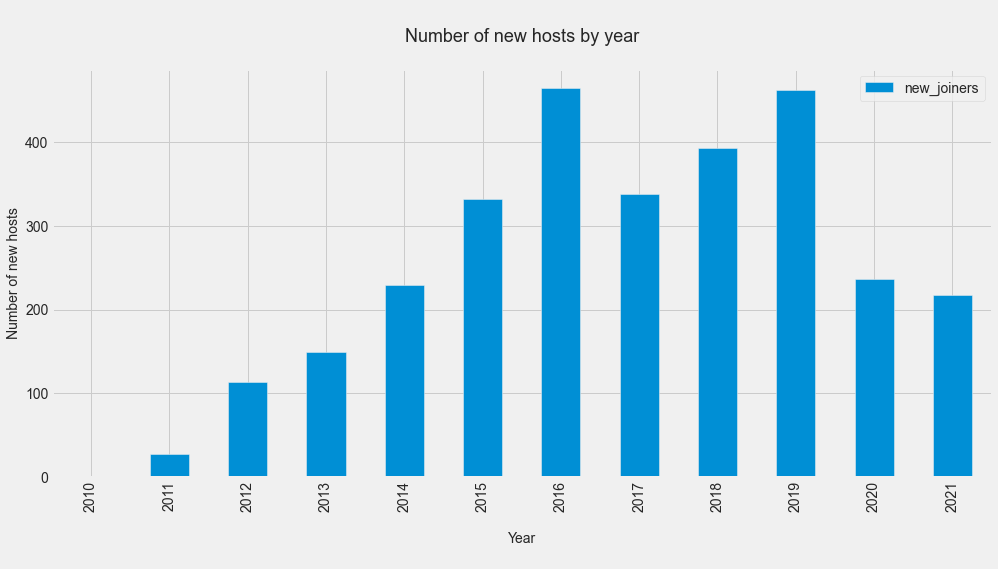

In [84]:

df.plot(kind="bar", figsize=(15,7))
plt.title('\nNumber of new hosts by year\n', fontsize=18)
plt.xlabel('\nYear\n', fontsize=14)
plt.ylabel('Number of new hosts', fontsize=14)

# plt.savefig('4.png')
plt.show()

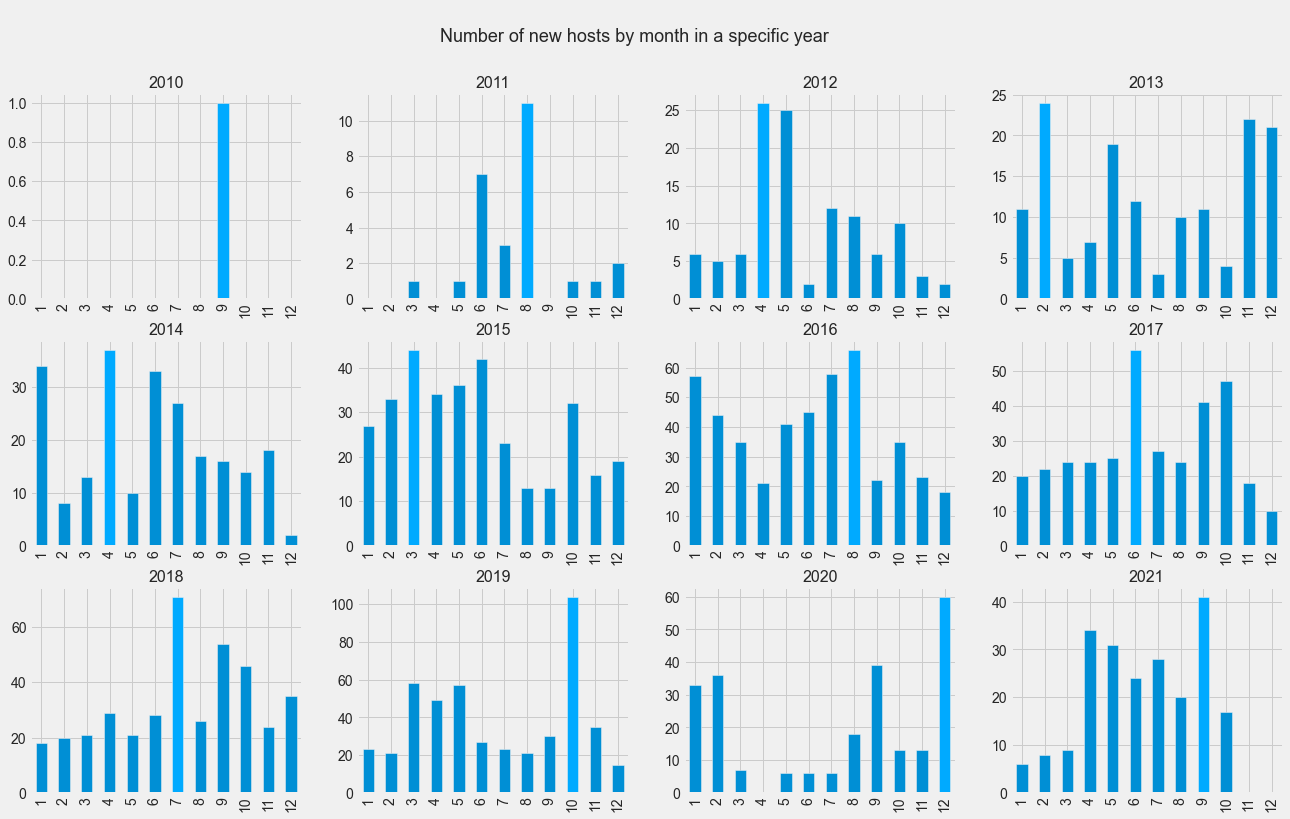

In [85]:
import math
# print(int(math.ceil(4.2)))   # always rounds up


df = dataset.groupby(dataset.host_since.dt.year).size().reset_index()
df.columns = ['year', 'new_joiners']
df.index = df['year']
df.drop(['year'], axis=1, inplace=True)


# vars
years = list(df.index)
months = list(np.arange(1,13))
columns = 4
rows = int(math.ceil( len(years)/columns ))

# # creating dummy dataframe
# merged = pd.DataFrame(list(0 for x in months), columns = ['dummy'], index = months)

dataframes = []

# creating a plot with subl
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(20, 12))

axes = axes.ravel()

for index, year in enumerate(years):
    # selecting a year
    df_year = dataset[dataset['host_since'].dt.year == year]
    # grouping new hosts by a month
    df_year = df_year.groupby(df_year.host_since.dt.month).size().reset_index()
    df_year.columns = ['month', 'new_joiners']
    df_year.index = df_year['month']
    df_year.drop(['month'], axis=1, inplace=True)
    # giving 0 to the months that do not have any new joiners
    
    data = df_year.T.to_dict('list')
    for m in months:
        if m not in data: data[m] = [0] 
    data = dict(sorted(data.items()))
    # putting together the final frame
    df_year = pd.DataFrame(list( data[x] for x in data), columns = ['new_joiners'], index = months)
    
    colors = ['#008fd5' if (x <df_year['new_joiners'].max()) else '#00aaff' for x in list(df_year['new_joiners']) ]
 
    sub = df_year['new_joiners'].plot(kind="bar", ax=axes[index], color=colors)
    sub.set_title(str(year), fontsize=16)
    # rename a column in the dataframe
    df_year.columns = [year]
    dataframes.append(df_year)
    

plt.suptitle('\nNumber of new hosts by month in a specific year', fontsize=18)
plt.show()

In [86]:
# the same data as above in tabular form 
df = pd.concat(dataframes, axis=1)
df.index.name = 'month' # naming index
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,
1,0,0,6,11,34,27,57,20,18,23,33,6
2,0,0,5,24,8,33,44,22,20,21,36,8
3,0,1,6,5,13,44,35,24,21,58,7,9
4,0,0,26,7,37,34,21,24,29,49,0,34
5,0,1,25,19,10,36,41,25,21,57,6,31
6,0,7,2,12,33,42,45,56,28,27,6,24
7,0,3,12,3,27,23,58,27,71,23,6,28
8,0,11,11,10,17,13,66,24,26,21,18,20
9,1,0,6,11,16,13,22,41,54,30,39,41


In [87]:
# Swapping rows with columns using transpose() function
df = df.T
df.index.name = 'year'
frame = df.copy()
df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,0,0,0,0,0,0,0,0,1,0,0,0
2011,0,0,1,0,1,7,3,11,0,1,1,2
2012,6,5,6,26,25,2,12,11,6,10,3,2
2013,11,24,5,7,19,12,3,10,11,4,22,21
2014,34,8,13,37,10,33,27,17,16,14,18,2
2015,27,33,44,34,36,42,23,13,13,32,16,19
2016,57,44,35,21,41,45,58,66,22,35,23,18
2017,20,22,24,24,25,56,27,24,41,47,18,10
2018,18,20,21,29,21,28,71,26,54,46,24,35


In [88]:
# finding a month where we have the highest number of new joiners in a year
month = df.idxmax(axis=1)
month = pd.DataFrame(month, columns=['month'])
max_value = df.max(axis = 1)
max_value = pd.DataFrame(max_value, columns=['max'])
max_joiners_in_year = pd.concat([month, max_value], axis=1)
max_joiners_in_year

,month,max
year,,
2010,9,1
2011,8,11
2012,4,26
2013,2,24
2014,4,37
2015,3,44
2016,8,66
2017,6,56
2018,7,71


In [89]:
# adding a new column with summing values for year
df["sum"] = df.sum(axis=1)
df

month,1,2,3,4,5,6,7,8,9,10,11,12,sum
year,,,,,,,,,,,,,
2010,0,0,0,0,0,0,0,0,1,0,0,0,1
2011,0,0,1,0,1,7,3,11,0,1,1,2,27
2012,6,5,6,26,25,2,12,11,6,10,3,2,114
2013,11,24,5,7,19,12,3,10,11,4,22,21,149
2014,34,8,13,37,10,33,27,17,16,14,18,2,229
2015,27,33,44,34,36,42,23,13,13,32,16,19,332
2016,57,44,35,21,41,45,58,66,22,35,23,18,465
2017,20,22,24,24,25,56,27,24,41,47,18,10,338
2018,18,20,21,29,21,28,71,26,54,46,24,35,393


##### Cumulative graph

In [90]:
frame

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,0,0,0,0,0,0,0,0,1,0,0,0
2011,0,0,1,0,1,7,3,11,0,1,1,2
2012,6,5,6,26,25,2,12,11,6,10,3,2
2013,11,24,5,7,19,12,3,10,11,4,22,21
2014,34,8,13,37,10,33,27,17,16,14,18,2
2015,27,33,44,34,36,42,23,13,13,32,16,19
2016,57,44,35,21,41,45,58,66,22,35,23,18
2017,20,22,24,24,25,56,27,24,41,47,18,10
2018,18,20,21,29,21,28,71,26,54,46,24,35


In [91]:
# pandas dataframe to numpy matrix
np_matrix = frame.to_numpy()
np_matrix

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   1,   0,   1,   7,   3,  11,   0,   1,   1,   2],
       [  6,   5,   6,  26,  25,   2,  12,  11,   6,  10,   3,   2],
       [ 11,  24,   5,   7,  19,  12,   3,  10,  11,   4,  22,  21],
       [ 34,   8,  13,  37,  10,  33,  27,  17,  16,  14,  18,   2],
       [ 27,  33,  44,  34,  36,  42,  23,  13,  13,  32,  16,  19],
       [ 57,  44,  35,  21,  41,  45,  58,  66,  22,  35,  23,  18],
       [ 20,  22,  24,  24,  25,  56,  27,  24,  41,  47,  18,  10],
       [ 18,  20,  21,  29,  21,  28,  71,  26,  54,  46,  24,  35],
       [ 23,  21,  58,  49,  57,  27,  23,  21,  30, 104,  35,  15],
       [ 33,  36,   7,   0,   6,   6,   6,  18,  39,  13,  13,  60],
       [  6,   8,   9,  34,  31,  24,  28,  20,  41,  17,   0,   0]],
      dtype=int64)

In [92]:
# transforming nD numpy matrix into 1D numpy array
np_matrix_1d = np_matrix.ravel()
new_joiners = np_matrix_1d
new_joiners

array([  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
         0,   1,   0,   1,   7,   3,  11,   0,   1,   1,   2,   6,   5,
         6,  26,  25,   2,  12,  11,   6,  10,   3,   2,  11,  24,   5,
         7,  19,  12,   3,  10,  11,   4,  22,  21,  34,   8,  13,  37,
        10,  33,  27,  17,  16,  14,  18,   2,  27,  33,  44,  34,  36,
        42,  23,  13,  13,  32,  16,  19,  57,  44,  35,  21,  41,  45,
        58,  66,  22,  35,  23,  18,  20,  22,  24,  24,  25,  56,  27,
        24,  41,  47,  18,  10,  18,  20,  21,  29,  21,  28,  71,  26,
        54,  46,  24,  35,  23,  21,  58,  49,  57,  27,  23,  21,  30,
       104,  35,  15,  33,  36,   7,   0,   6,   6,   6,  18,  39,  13,
        13,  60,   6,   8,   9,  34,  31,  24,  28,  20,  41,  17,   0,
         0], dtype=int64)

In [93]:
# creating year-month list that will be used as an index
year_month = ["-".join([str(y),str(m)]) for y in years for m in months]

https://dfrieds.com/data-visualizations/when-use-cumulative-frequency-graph.html

In [94]:
# creating a new data frame from 1d numpy array and year_month data
cum_sum = pd.DataFrame(list(new_joiners), columns=['new_hosts'], index=year_month)
cum_sum.index.name = 'year_month'

# adding a new column with the Cumulative Sum 
cum_sum['cumulative'] = cum_sum['new_hosts'].cumsum()
cum_sum

,new_hosts,cumulative
year_month,,
2010-1,0,0
2010-2,0,0
2010-3,0,0
2010-4,0,0
2010-5,0,0
2010-6,0,0
2010-7,0,0
2010-8,0,0
2010-9,1,1


In [95]:
cum_sum.drop(['new_hosts'], axis=1, inplace=True)

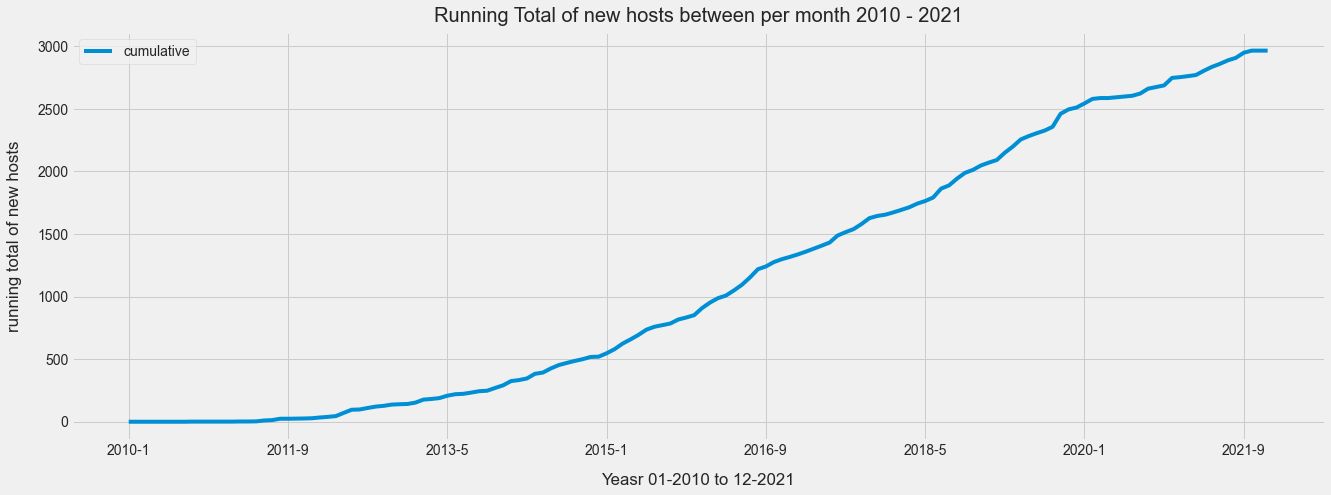

In [96]:
cum_sum.plot(kind="line", figsize=(20,7))
plt.title("Running Total of new hosts between per month 2010 - 2021", y=1.01, fontsize=20)
plt.ylabel("running total of new hosts", labelpad=15)
plt.xlabel("Yeasr 01-2010 to 12-2021", labelpad=15)
plt.show()

### host_response_time

In [97]:
print(f"Number of rows with null values in the 'host_response_time' column:  {dataset['host_response_time'].isna().sum()} ")
print(f"This is { int((dataset['host_response_time'].isna().sum()/dataset.shape[0]) * 100) } precent of all Airbnbs")

Number of rows with null values in the 'host_response_time' column:  486 
This is 16 precent of all Airbnbs


Checking unique values for the 'host_response_time'

- https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c

In [98]:
# selecting rows of data containing the host_response_time
df = dataset[['host_response_time', 'price', 'accommodates', 'room_type', 'property_type','beds']]

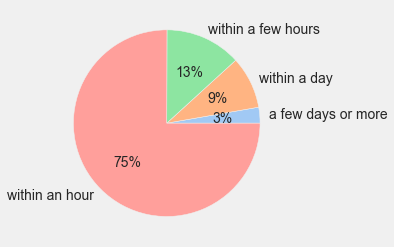

,counts,precentage
host_response_time,,
a few days or more,68,2.741935
within a day,224,9.032258
within a few hours,327,13.185484
within an hour,1861,75.040323


In [99]:
grouped = df["host_response_time"].value_counts().sort_index().rename_axis('host_response_time').to_frame('counts')
grouped['precentage'] = (df["host_response_time"].value_counts(normalize=True) * 100)

colors = sns.color_palette('pastel')[0:grouped.index.shape[0]]
plt.pie(grouped['counts'], labels=grouped.index, autopct='%.0f%%', colors = colors)
plt.show()

grouped

In [100]:
grouped.index.shape[0]

4

In [101]:
print(df.shape)
df.describe()

(2966, 6)


,price,accommodates,beds
count,2966.000000,2966.000000,2966.000000
mean,85.650708,3.422792,2.037424
std,53.951037,2.243959,1.652312
min,10.000000,1.000000,1.000000
25%,42.000000,2.000000,1.000000
50%,75.000000,2.000000,2.000000
75%,114.000000,4.000000,2.750000
max,267.000000,16.000000,32.000000


#### Box plots are a quick and efficient way to visualize a relationship between a categorical and a numerical variable
- https://clevertap.com/blog/exploring-the-relationship-between-variables-visually/

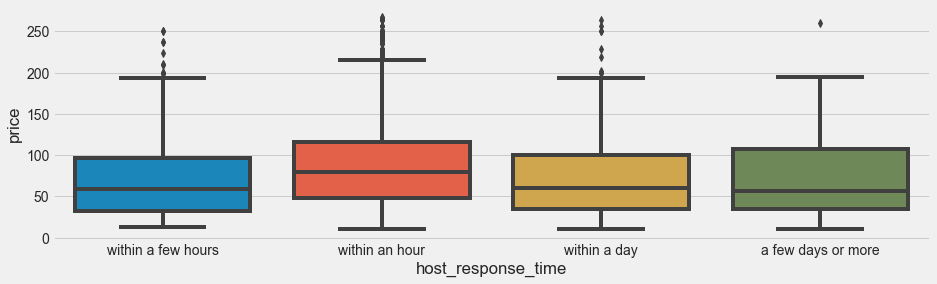

In [102]:
plt.figure(figsize=(14,4))
sns.boxplot(y='price',x='host_response_time',data=df)
plt.show()

We see that places that provide confirmation 'within an hour' tend to have higher prices. The next are places with 'within a few hours' and 'within a day', their prices look alike. The lowest prices can be seen more often in the places responding within a few days or more'. This can be also visualized in the table using pandas pivot_table().

In [103]:

# finding median price per each response type using pandas pevot table
pd.pivot_table(df, 'price','host_response_time', aggfunc='median')

,price
host_response_time,
a few days or more,57.0
within a day,60.0
within a few hours,59.0
within an hour,80.0


In [104]:
# median price for the specific room type and their response taking into the consideration the respone time 
pd.pivot_table(df, 'price','host_response_time','room_type', aggfunc='median')

room_type,Entire home/apt,Hotel room,Private room,Shared room
host_response_time,,,,
a few days or more,144.0,NaN,40.0,55.0
within a day,99.0,NaN,39.0,24.0
within a few hours,95.0,NaN,36.0,42.5
within an hour,96.0,93.0,39.0,38.0


### host_response_rate

In [105]:
print(f"Number of rows with null values in the 'host_response_time' column:  {dataset['host_response_rate'].isna().sum()} ")
print(f"This is { int((dataset['host_response_rate'].isna().sum()/dataset.shape[0]) * 100) } precent of all Airbnbs")

Number of rows with null values in the 'host_response_time' column:  486 
This is 16 precent of all Airbnbs


In [106]:
# selecting rows of data containing the host_response_time; null are not taken into the consideration
df = dataset[['host_response_rate','host_response_time', 'price', 'accommodates', 'room_type', 'property_type','beds']]

# selecting rows that do not contain null values
df = df[df.host_response_rate.notnull()]

In [107]:
grouped = df["host_response_rate"].value_counts().sort_index().rename_axis('host_response_rate').to_frame('counts')
grouped['precentage'] = (df["host_response_rate"].value_counts(normalize=True) * 100)

grouped.head(2)

,counts,precentage
host_response_rate,,
0%,38,1.532258
10%,5,0.201613


In [108]:
# transposing the dataframe for the displaying purposes
frame = grouped.copy()
frame.T

host_response_rate,0%,10%,100%,13%,14%,20%,25%,29%,30%,33%,38%,40%,47%,50%,56%,60%,62%,64%,67%,69%,70%,71%,73%,75%,76%,78%,79%,80%,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%
counts,38.000000,5.000000,1575.000000,1.000000,2.000000,4.00000,6.000000,1.000000,2.000000,3.000000,1.000000,4.00000,1.000000,22.000000,3.000000,12.000000,24.000000,2.000000,13.000000,4.00000,19.000000,8.000000,1.000000,14.000000,1.000000,5.000000,2.000000,44.000000,12.000000,4.00000,7.000000,4.00000,9.000000,10.000000,1.000000,30.000000,19.000000,105.000000,14.000000,22.000000,5.000000,72.000000,67.000000,33.000000,97.00000,56.000000,96.000000
precentage,1.532258,0.201613,63.508065,0.040323,0.080645,0.16129,0.241935,0.040323,0.080645,0.120968,0.040323,0.16129,0.040323,0.887097,0.120968,0.483871,0.967742,0.080645,0.524194,0.16129,0.766129,0.322581,0.040323,0.564516,0.040323,0.201613,0.080645,1.774194,0.483871,0.16129,0.282258,0.16129,0.362903,0.403226,0.040323,1.209677,0.766129,4.233871,0.564516,0.887097,0.201613,2.903226,2.701613,1.330645,3.91129,2.258065,3.870968


In [109]:
# checking the unique values in the "host_response_rate"
df["host_response_rate"].unique()

array(['100%', '97%', '85%', '67%', '62%', '92%', '93%', '0%', '80%',
       '88%', '33%', '78%', '90%', '64%', '99%', '96%', '95%', '60%',
       '69%', '25%', '83%', '89%', '50%', '98%', '20%', '86%', '56%',
       '71%', '75%', '70%', '94%', '14%', '30%', '91%', '40%', '84%',
       '81%', '13%', '76%', '10%', '29%', '47%', '38%', '79%', '82%',
       '87%', '73%'], dtype=object)

In [110]:
# converting string to numbers
df['host_response_rate_number'] = df['host_response_rate'].str.replace("%", '').str.strip().astype(int)

In [111]:
df["host_response_rate_number"].unique()

array([100,  97,  85,  67,  62,  92,  93,   0,  80,  88,  33,  78,  90,
        64,  99,  96,  95,  60,  69,  25,  83,  89,  50,  98,  20,  86,
        56,  71,  75,  70,  94,  14,  30,  91,  40,  84,  81,  13,  76,
        10,  29,  47,  38,  79,  82,  87,  73])

In [112]:
df.head(2)

,host_response_rate,host_response_time,price,accommodates,room_type,property_type,beds,host_response_rate_number
id,,,,,,,,
157612,100%,within a few hours,41.0,3,Entire home/apt,Entire loft,2.0,100
299194,100%,within an hour,50.0,4,Entire home/apt,Entire chalet,1.0,100


In [113]:
# finding median host_response_rate_number per each response type using pandas pevot table
pd.pivot_table(df, 'host_response_rate_number','host_response_time', aggfunc='median')

,host_response_rate_number
host_response_time,
a few days or more,0
within a day,85
within a few hours,100
within an hour,100


**Crosstable** - we used it for  **host_response_time** and **host_response_rate** <br>


First, the **host_response_time**, we are going to shrik it to **10 categories** based on **host_response_rate_number** using pandas.cut to segment and sort data values into bins.

In [114]:
bins= [0, 20,40,60, 80, 100] # bins with 5 classes
labels = ['very bad', 'bad', 'poor',  'responsive',  'excellent']
df['responsiveness'] = pd.cut(df['host_response_rate_number'], bins=bins, labels=labels, right=True)
df.head(3)


,host_response_rate,host_response_time,price,accommodates,room_type,property_type,beds,host_response_rate_number,responsiveness
id,,,,,,,,,
157612,100%,within a few hours,41.0,3,Entire home/apt,Entire loft,2.0,100,excellent
299194,100%,within an hour,50.0,4,Entire home/apt,Entire chalet,1.0,100,excellent
411843,97%,within a few hours,131.0,6,Entire home/apt,Entire rental unit,5.0,97,excellent


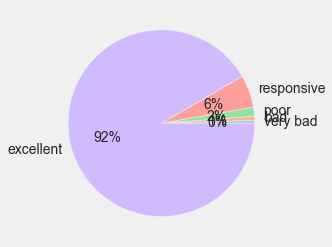

,count,precentage
responsiveness,,
very bad,12,0.491400
bad,17,0.696151
poor,38,1.556102
responsive,137,5.610156
excellent,2238,91.646192


In [115]:

# percentage of responsiveness 
grouped = df["responsiveness"].value_counts().sort_index().rename_axis('responsiveness').to_frame('count')
grouped['precentage'] = (df["responsiveness"].value_counts(normalize=True) * 100)

colors = sns.color_palette('pastel')[0:grouped.index.shape[0]]
plt.pie(grouped['count'], labels=grouped.index, autopct='%.0f%%', colors = colors)
plt.show()

grouped

In [116]:
# checking responsiveness per response time
crosstable=pd.crosstab(df['host_response_time'],df['responsiveness'])
crosstable

responsiveness,very bad,bad,poor,responsive,excellent
host_response_time,,,,,
a few days or more,12,17,1,0,0
within a day,0,0,33,72,119
within a few hours,0,0,1,23,303
within an hour,0,0,3,42,1816


### host_is_superhost

In [117]:
dataset["host_is_superhost"].replace({'t': 'true', 'f':'false'}, inplace=True)

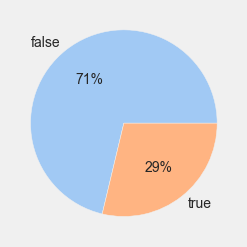

,count,precentage
host_is_superhost,,
false,2114,71.27
true,852,28.73


In [118]:
pd.options.display.float_format = "{:,.2f}".format
grouped = dataset["host_is_superhost"].value_counts().sort_index().rename_axis('host_is_superhost').to_frame('count')
grouped['precentage'] = (dataset["host_is_superhost"].value_counts(normalize=True) * 100)

colors = sns.color_palette('pastel')[0:grouped.index.shape[0]]
plt.pie(grouped['count'], labels=grouped.index, autopct='%.0f%%', colors = colors)
plt.show()

grouped

##### host_is_superhost vs price

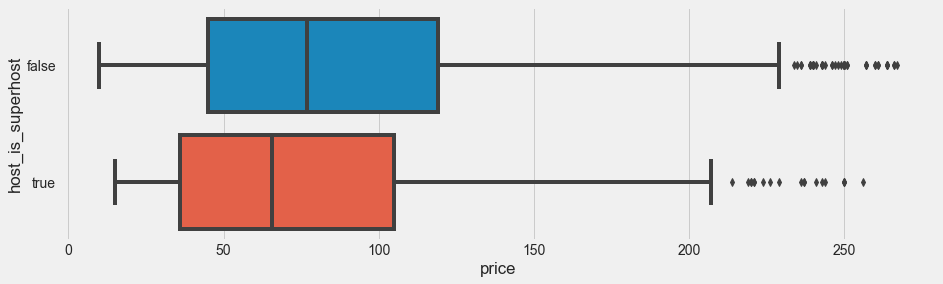

In [119]:
plt.figure(figsize=(14,4))
sns.boxplot(y='host_is_superhost',x='price',data=dataset)
plt.show()

In [120]:
# finding median price per each response type using pandas pevot table
pd.pivot_table(dataset, 'price','host_is_superhost', aggfunc='median')

,price
host_is_superhost,
false,77.00
true,65.50


As we can see the superhosts tend to charge less than normal hosts.

### Review scores information cleaning

In [121]:
# selecting columns containing 'review'
review_info = [(i) for i in dataset.columns if 'review' in i]
print(review_info)

['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [122]:
dataset[review_info].head(5)

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,,,,,,,,,,,,,
157612,96,0,0,2016-07-25,2019-12-08,4.90,4.91,4.91,4.98,4.92,4.62,4.90,1.50
283495,10,0,0,2015-04-26,2018-08-05,5.00,5.00,4.90,5.00,5.00,4.80,5.00,0.13
299194,291,24,1,2017-08-12,2021-09-05,4.53,4.68,4.56,4.82,4.86,4.72,4.60,5.69
310742,64,0,0,2016-07-18,2016-11-23,4.66,4.75,4.27,4.77,4.86,4.81,4.65,1.00
390028,40,0,0,2014-12-08,2017-04-23,4.80,4.87,4.90,5.00,4.95,4.82,4.82,0.48


Nearly all columns about reviewers have missing data on the same level - nearly 15%. This rate of missing information is equal to 19.9% for this data before any cleaning.

After reviewing the data we decided to drop the following columns: 'number_of_reviews_ltm', 'number_of_reviews_l30d','first_review', 'last_review'

In [123]:
to_be_removed = ['number_of_reviews_ltm', 'number_of_reviews_l30d','first_review', 'last_review']
dataset.drop(to_be_removed, axis=1, inplace=True)
[review_info.remove(x) for x in to_be_removed]
dataset.shape

(2966, 54)

In [124]:
dataset[dataset['number_of_reviews'] == 0.0].shape

(432, 54)

There are already 432 places without any reviews in the dataset

In [125]:
df = dataset[dataset['number_of_reviews'] == 0.0]
df[review_info].head()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,,,,,,,,,
968898,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1241309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8560806,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9249626,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9698830,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We decided not to remove the data with null values in the number_of_reviews, instead, we replace the null values with 0 
<br><br>
Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [126]:
dataset['number_of_reviews'].fillna(0,inplace=True)

In [127]:
dataset[['price'] + review_info].describe()

,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,"2,966.00","2,966.00","2,534.00","2,523.00","2,523.00","2,524.00","2,523.00","2,524.00","2,524.00","2,534.00"
mean,85.65,33.35,4.65,4.72,4.66,4.77,4.79,4.71,4.64,2.28
std,53.95,63.61,0.58,0.51,0.52,0.47,0.46,0.44,0.50,5.46
min,10.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.01
25%,42.00,2.00,4.56,4.68,4.54,4.76,4.77,4.63,4.53,0.54
50%,75.00,10.00,4.81,4.89,4.82,4.93,4.94,4.83,4.77,1.21
75%,114.00,35.00,4.97,5.00,5.00,5.00,5.00,4.97,4.93,2.58
max,267.00,"1,205.00",5.00,5.00,5.00,5.00,5.00,5.00,5.00,176.00


### Location - Lat & Long, neighbourhoods

### Lat & Long and Price

city center of Greater Manchester [city center]
- https://geohack.toolforge.org/geohack.php?pagename=Manchester_city_centre&params=53.479167_N_2.244167_W_region:GB_type:city(17861)

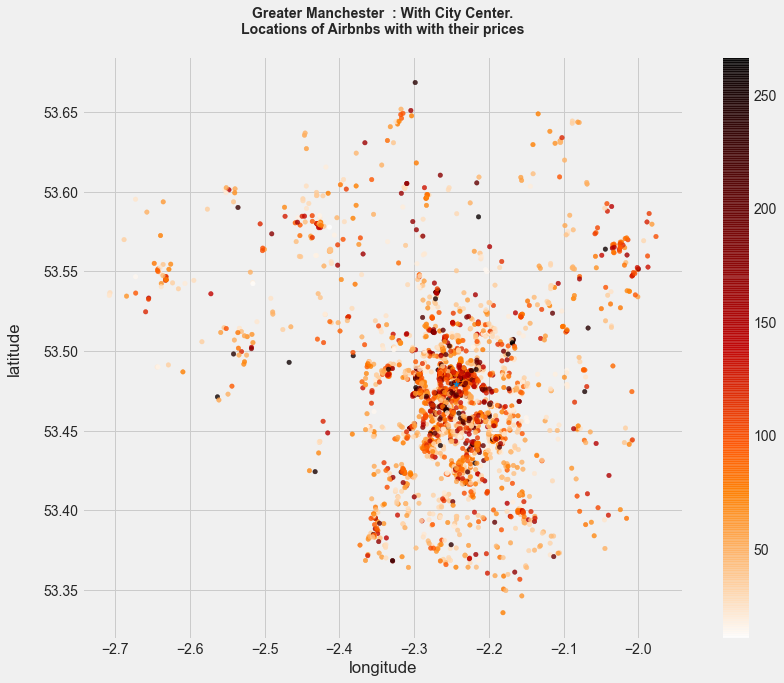

In [128]:
city_center = [53.479167,-2.244167]

fig = plt.figure(figsize = (12, 10))
plt.scatter(x=dataset["longitude"], y=dataset["latitude"],c=dataset["price"], cmap='gist_heat_r',s=20,alpha=0.8)
plt.colorbar()
ploted_center = plt.scatter(city_center[1], city_center[0], marker='*')
plt.xlabel('longitude')
plt.ylabel('latitude\n')
plt.title('Greater Manchester  : With City Center.\nLocations of Airbnbs with with their prices\n', fontsize=14, fontweight='bold')
plt.show()

##### neighbourhood_group_cleansed and neighbourhood_cleansed

In [129]:
grouped = dataset["neighbourhood_group_cleansed"].value_counts().sort_index().rename_axis('neighbourhood_group_cleansed').to_frame('count')
grouped['precentage'] = (dataset["neighbourhood_group_cleansed"].value_counts(normalize=True) * 100)

C:\Users\Ukasz\Anaconda3\envs\geopandas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


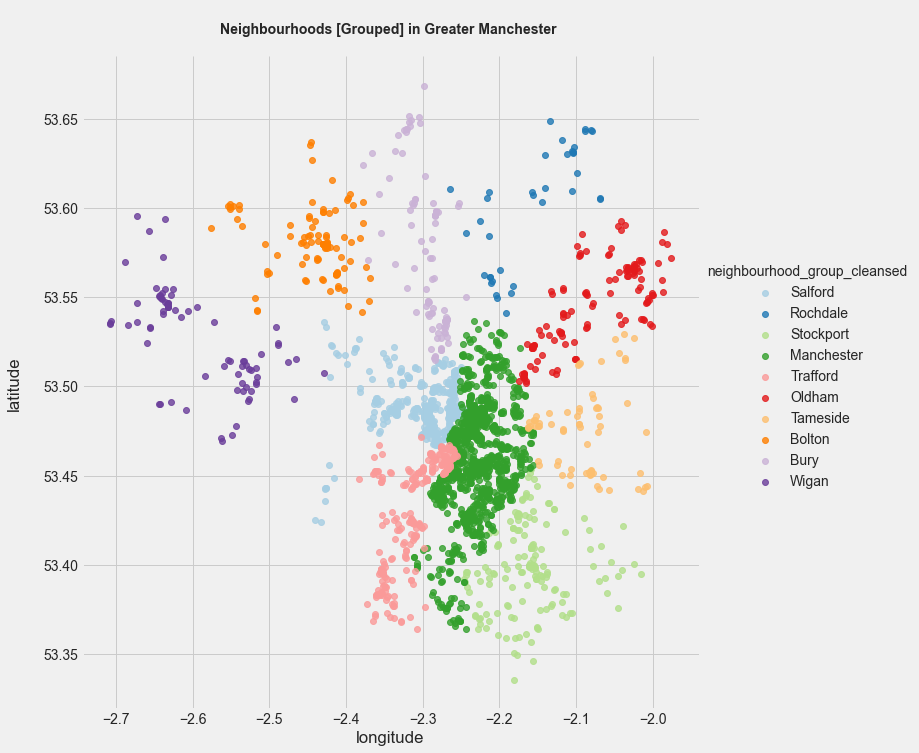

In [130]:
sns.lmplot('longitude', 'latitude', data=dataset,  hue='neighbourhood_group_cleansed', fit_reg=False, height=10,palette="Paired",)

plt.xlabel('longitude')
plt.ylabel('latitude\n')
plt.title('\nNeighbourhoods [Grouped] in Greater Manchester \n', fontsize=14, fontweight='bold')
plt.show()

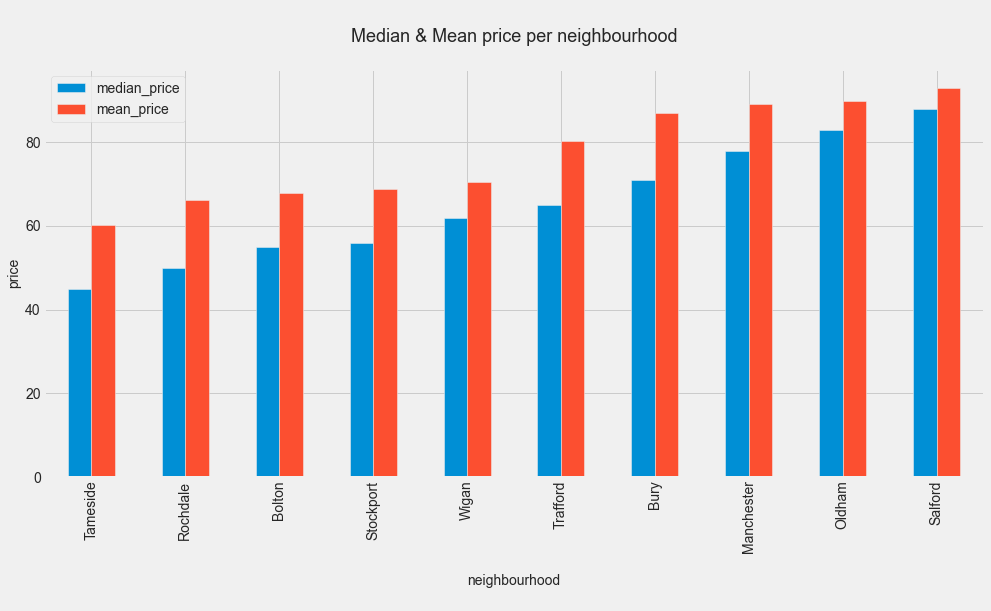

,median_price,mean_price,count,precentage
neighbourhood_group_cleansed,,,,
Tameside,45.00,60.19,70,2.36
Rochdale,50.00,66.21,38,1.28
Bolton,55.00,67.79,106,3.57
Stockport,56.00,68.76,165,5.56
Wigan,62.00,70.49,77,2.60
Trafford,65.00,80.19,258,8.70
Bury,71.00,87.10,97,3.27
Manchester,78.00,89.18,1507,50.81
Oldham,83.00,89.85,124,4.18


In [131]:
df_median = pd.pivot_table(dataset, 'price','neighbourhood_group_cleansed', aggfunc='median')
df_median.columns = ['median_price']
df_mean = pd.pivot_table(dataset, 'price','neighbourhood_group_cleansed', aggfunc='mean')
df_mean.columns = ['mean_price']
df = pd.concat([df_median, df_mean], axis=1)
df.sort_values(by=['median_price'], ascending=True, inplace=True)

df.plot(kind="bar", figsize=(15,7))
plt.title('\nMedian & Mean price per neighbourhood\n', fontsize=18)
plt.xlabel('\nneighbourhood\n', fontsize=14)
plt.ylabel('price', fontsize=14)

plt.show()
df = pd.concat([df, grouped], axis=1)
df

#### neighbourhood_cleansed

In [132]:
grouped = dataset["neighbourhood_cleansed"].value_counts().sort_index().rename_axis('neighbourhood_cleansed').to_frame('count')
grouped['precentage'] = (dataset["neighbourhood_cleansed"].value_counts(normalize=True) * 100)

C:\Users\Ukasz\Anaconda3\envs\geopandas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


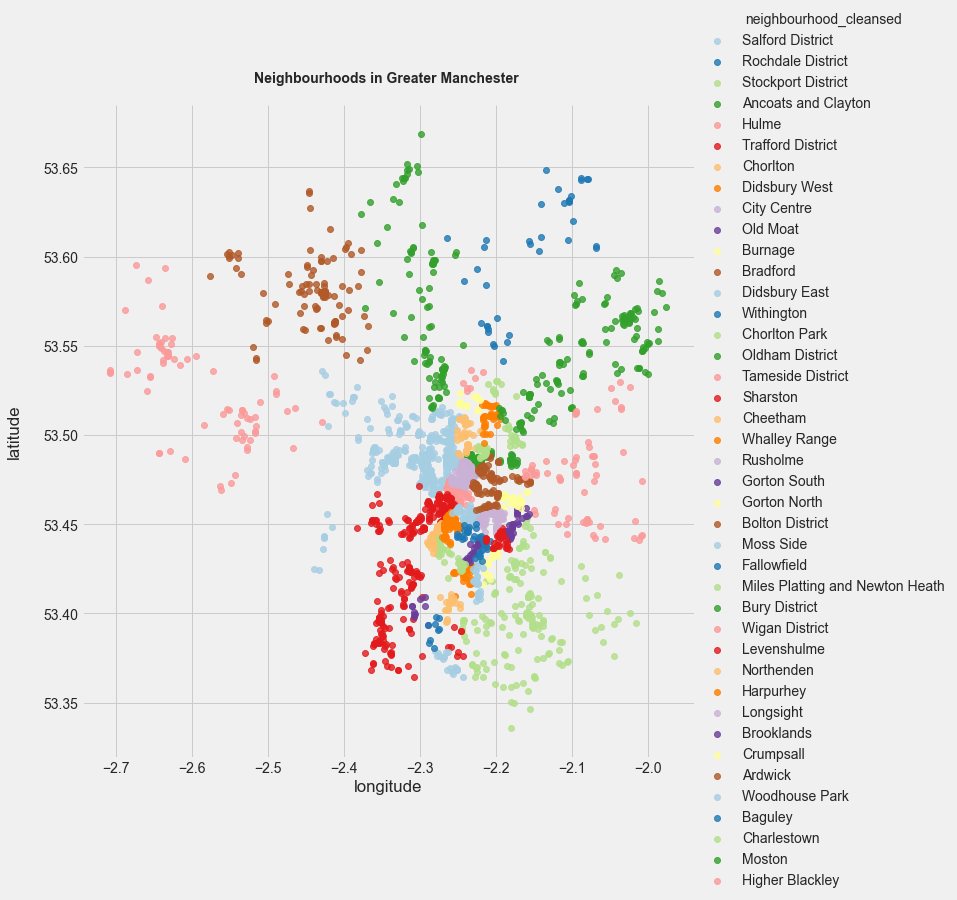

In [133]:
sns.lmplot('longitude', 'latitude', data=dataset,  hue='neighbourhood_cleansed', fit_reg=False, height=10,palette="Paired",)

plt.xlabel('longitude')
plt.ylabel('latitude\n')
plt.title('\nNeighbourhoods in Greater Manchester \n', fontsize=14, fontweight='bold')
plt.show()

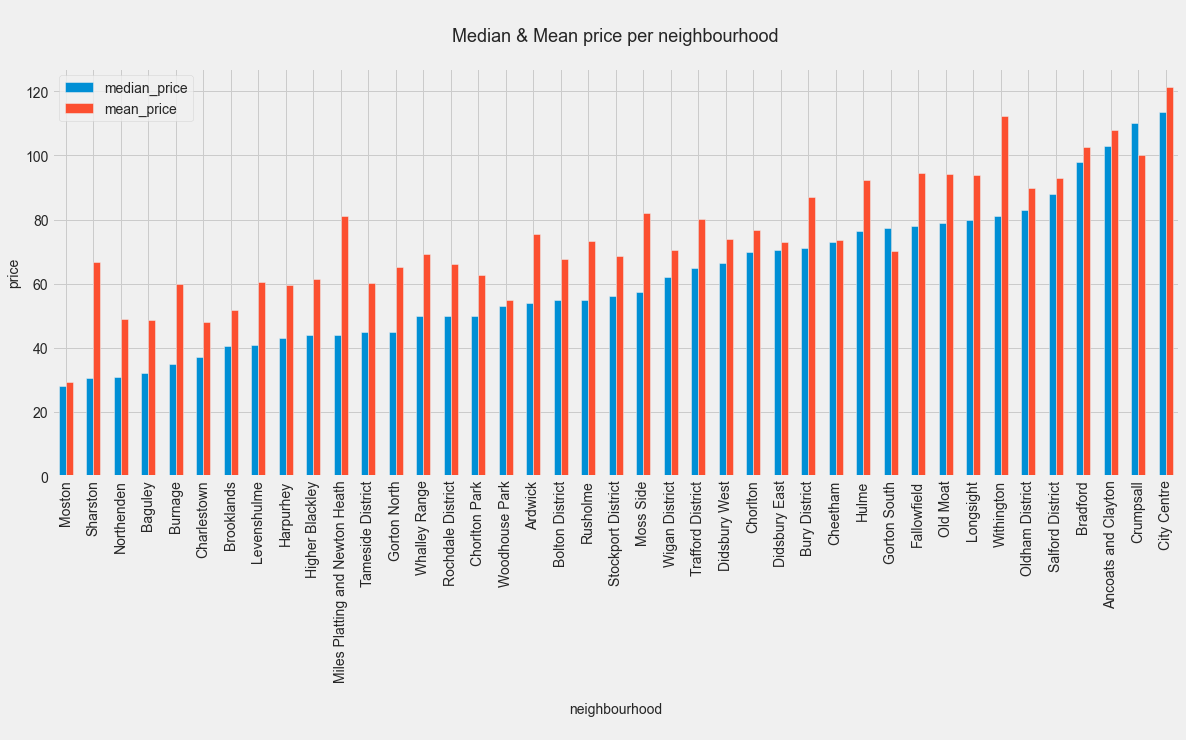

,median_price,mean_price,count,precentage,neighbourhood_group_cleansed
neighbourhood_cleansed,,,,,
Moston,28.00,29.33,6,0.20,Manchester
Sharston,30.50,66.88,8,0.27,Manchester
Northenden,31.00,49.05,22,0.74,Manchester
Baguley,32.00,48.78,9,0.30,Manchester
Burnage,35.00,59.95,21,0.71,Manchester
Charlestown,37.00,48.20,10,0.34,Manchester
Brooklands,40.50,51.90,10,0.34,Manchester
Levenshulme,41.00,60.41,41,1.38,Manchester
Harpurhey,43.00,59.53,36,1.21,Manchester


In [134]:
df_median = pd.pivot_table(dataset, 'price','neighbourhood_cleansed', aggfunc='median')
df_median.columns = ['median_price']
df_mean = pd.pivot_table(dataset, 'price','neighbourhood_cleansed', aggfunc='mean')
df_mean.columns = ['mean_price']
df = pd.concat([df_median, df_mean], axis=1)
df.sort_values(by=['median_price'], ascending=True, inplace=True)

df.plot(kind="bar", figsize=(18,7))
plt.title('\nMedian & Mean price per neighbourhood\n', fontsize=18)
plt.xlabel('\nneighbourhood\n', fontsize=14)
plt.ylabel('price', fontsize=14)

plt.show()

grouped_neighbourhood = dataset[['neighbourhood_cleansed', 'neighbourhood_group_cleansed']].sort_values('neighbourhood_cleansed').drop_duplicates('neighbourhood_cleansed', keep='last').set_index('neighbourhood_cleansed')
df = pd.concat([df, grouped, grouped_neighbourhood], axis=1)
df


#### Distance to the City center & Price

Creating a new column to keep the distance between an Airbnb location and the city center of Manchester. Distance is given in km.
<br><br>
This is done with the usage of the **geopy** library

In [135]:
from geopy.distance import great_circle

def distance_to_mid(lat, lon):
    AirBnB = (lat, lon)
    return great_circle(city_center, AirBnB).km

dataset['distance'] = dataset.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)
dataset['distance'].describe()

count   2,966.00
mean        6.10
std         5.68
min         0.10
25%         1.83
50%         4.27
75%         8.22
max        31.27
Name: distance, dtype: float64

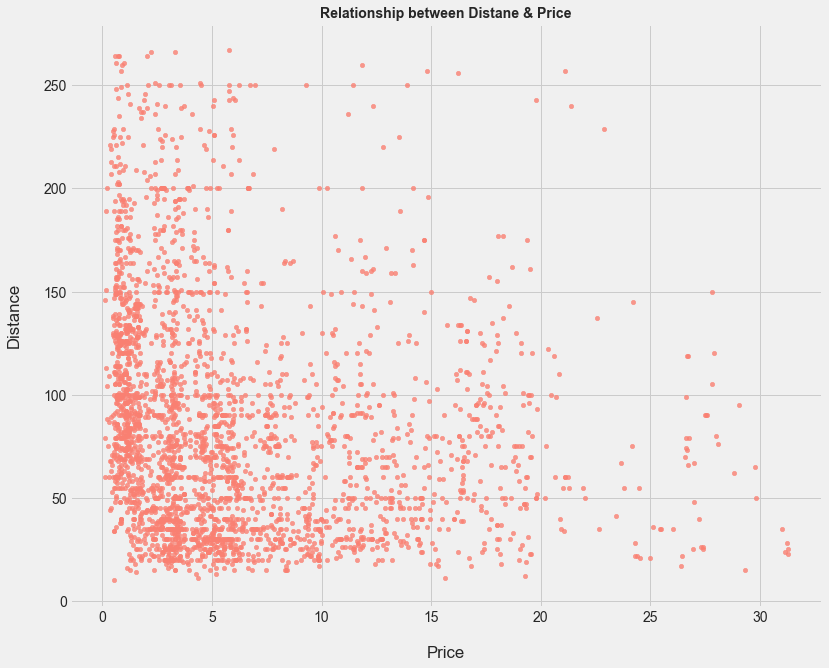

In [136]:
fig = plt.figure(figsize = (12, 10))
plt.scatter(x=dataset["distance"], y=dataset["price"],  c=['#fa8072'],s=20,alpha=0.8)

plt.title('Relationship between Distane & Price', fontsize=14, fontweight='bold')
plt.xlabel('\nPrice')
plt.ylabel('Distance\n')
plt.show()

Same idea but using a diffrent tool - Seborn's jointplot

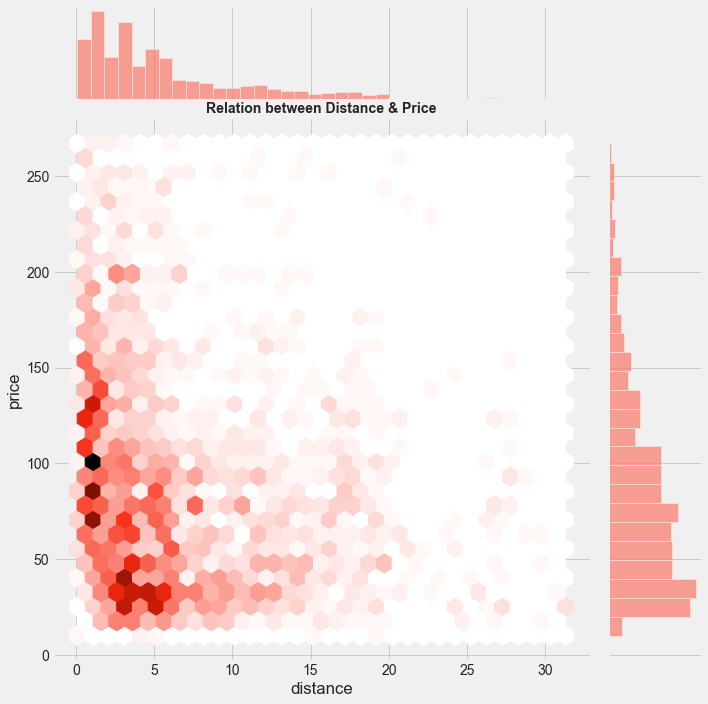

In [137]:
sns.jointplot(x=dataset["distance"], y=dataset["price"], kind="hex", color='#fa8072', height = 10)
plt.title('Relation between Distance & Price', fontsize=14, fontweight='bold');

#### host_is_superhost vs location

C:\Users\Ukasz\Anaconda3\envs\geopandas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


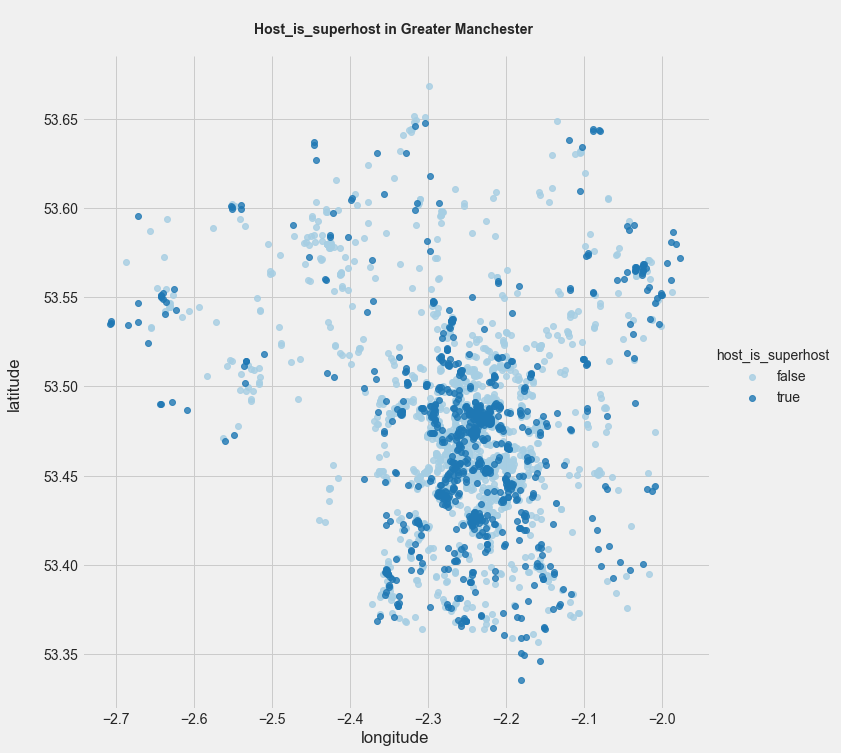

In [138]:
sns.lmplot('longitude', 'latitude', data=dataset,  hue='host_is_superhost', fit_reg=False, height=10,palette="Paired",)

plt.xlabel('longitude')
plt.ylabel('latitude\n')
plt.title('\nHost_is_superhost in Greater Manchester \n', fontsize=14, fontweight='bold')
plt.show()

In [139]:
# checking in which neighbourhood has the highest number of super hosts
crosstable=pd.crosstab(dataset['host_is_superhost'],dataset['neighbourhood_group_cleansed'])
crosstable = crosstable.T
crosstable['true_%'] = ((crosstable['true']) / (crosstable['false'] + crosstable['true'])) * 100
crosstable.sort_values(by=['true_%'], ascending=True, inplace=True)
crosstable = crosstable.T
crosstable

neighbourhood_group_cleansed,Bolton,Salford,Trafford,Manchester,Rochdale,Tameside,Wigan,Oldham,Bury,Stockport
host_is_superhost,,,,,,,,,,
false,86.00,408.00,188.00,"1,097.00",27.00,45.00,48.00,72.00,55.00,88.00
true,20.00,116.00,70.00,410.00,11.00,25.00,29.00,52.00,42.00,77.00
true_%,18.87,22.14,27.13,27.21,28.95,35.71,37.66,41.94,43.30,46.67


In [140]:
# checking in which neighbourhood has the highest number of super hosts
crosstable=pd.crosstab(dataset['host_is_superhost'],dataset['neighbourhood_cleansed'])
crosstable = crosstable.T
crosstable['true_%'] = ((crosstable['true']) / (crosstable['false'] + crosstable['true'])) * 100
crosstable.sort_values(by=['true_%'], ascending=True, inplace=True)
crosstable = crosstable.T
crosstable 

neighbourhood_cleansed,Charlestown,Withington,Fallowfield,Crumpsall,Longsight,Cheetham,Higher Blackley,Gorton South,Gorton North,Moss Side,Bolton District,Ancoats and Clayton,Hulme,Salford District,Baguley,Miles Platting and Newton Heath,Ardwick,Old Moat,Harpurhey,Trafford District,Burnage,City Centre,Rochdale District,Brooklands,Moston,Bradford,Tameside District,Northenden,Rusholme,Chorlton Park,Wigan District,Whalley Range,Levenshulme,Oldham District,Bury District,Stockport District,Didsbury West,Didsbury East,Chorlton,Woodhouse Park,Sharston
host_is_superhost,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
false,10.00,23.00,31.00,14.00,36.00,44.00,6.00,34.00,21.00,57.00,86.00,199.00,52.00,408.00,7.00,31.00,42.00,18.00,27.00,188.00,15.00,161.00,27.00,7.00,4.00,59.00,45.00,14.00,33.00,20.00,48.00,34.00,24.00,72.00,55.00,88.00,25.00,12.00,25.00,9.00,3.00
true,0.00,1.00,2.00,1.00,4.00,6.00,1.00,6.00,4.00,13.00,20.00,52.00,14.00,116.00,2.00,9.00,13.00,6.00,9.00,70.00,6.00,65.00,11.00,3.00,2.00,32.00,25.00,8.00,19.00,12.00,29.00,22.00,17.00,52.00,42.00,77.00,25.00,12.00,28.00,11.00,5.00
true_%,0.00,4.17,6.06,6.67,10.00,12.00,14.29,15.00,16.00,18.57,18.87,20.72,21.21,22.14,22.22,22.50,23.64,25.00,25.00,27.13,28.57,28.76,28.95,30.00,33.33,35.16,35.71,36.36,36.54,37.50,37.66,39.29,41.46,41.94,43.30,46.67,50.00,50.00,52.83,55.00,62.50


In [141]:
# the data above on the scaterplot 
d = crosstable.T.to_dict()
# adding a new column to the dataset called 'syper_host_true_%'
def add_data(row):
    return d['true_%'][row['neighbourhood_cleansed']]
dataset['syper_host_true_%'] = dataset.apply(add_data, axis=1)


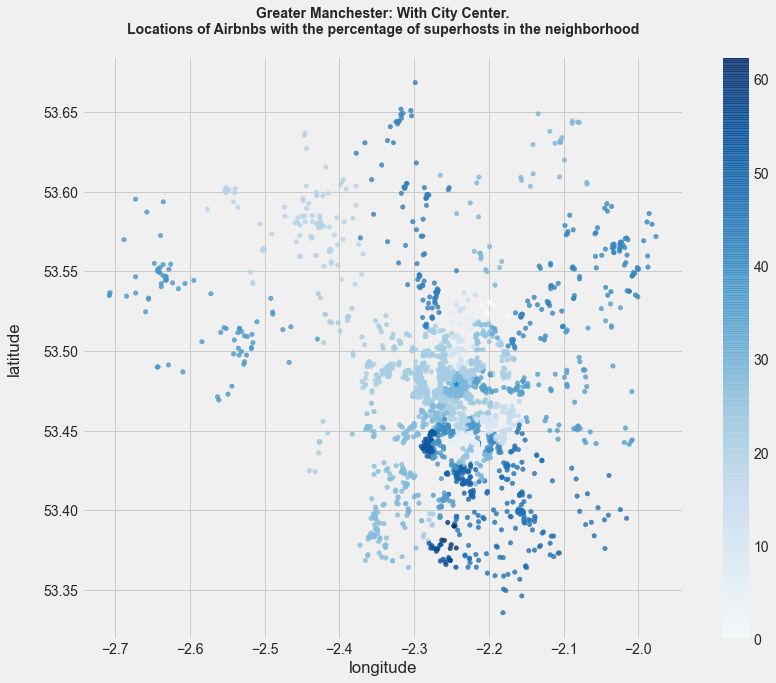

In [142]:
fig = plt.figure(figsize = (12, 10))
plt.scatter(x=dataset["longitude"], y=dataset["latitude"],c=dataset["syper_host_true_%"], cmap='Blues',s=20,alpha=0.8)
plt.colorbar()
ploted_center = plt.scatter(city_center[1], city_center[0], marker='*')
plt.xlabel('longitude')
plt.ylabel('latitude\n')
plt.title('Greater Manchester: With City Center.\nLocations of Airbnbs with the percentage of superhosts in the neighborhood\n', fontsize=14, fontweight='bold')
plt.show()

Number of neighborhoods with above (including) and below of 50 percent of superhosts

In [143]:
super_host_above_50 = dataset[dataset['syper_host_true_%'] >= 50]
a = len(super_host_above_50['neighbourhood_cleansed'].unique())
super_host_below_50 = dataset[dataset['syper_host_true_%'] < 50] 
b = len(super_host_below_50['neighbourhood_cleansed'].unique())
frame = pd.DataFrame({'Count': [a,b,a + b]}, index= ['Above including 50%','Below 50%', 'TOTAL'])
frame

,Count
Above including 50%,5
Below 50%,36
TOTAL,41


### review_scores_accuracy  vs price

In [144]:
print(dataset['review_scores_accuracy'].isnull().sum())
dataset['review_scores_accuracy'].describe()

443


count   2,523.00
mean        4.72
std         0.51
min         1.00
25%         4.68
50%         4.89
75%         5.00
max         5.00
Name: review_scores_accuracy, dtype: float64

In [145]:
# assigning score rate classes right including 
bins= [0,2,3, 4, 4.25,4.5,4.75,5] # bins with 5 classes
labels = ['0 - 2','2 - 3', '3 - 4', '4 - 4.25', '4.25 - 4.5', '4.5 - 4.75', '4.75 - 5']
df = dataset.copy()
df['review_scores_accuracy_classed'] = pd.cut(df['review_scores_accuracy'], bins=bins, labels=labels, right=True)

In [146]:
grouped = df["review_scores_accuracy_classed"].value_counts().sort_index().rename_axis('review_scores').to_frame('count')
grouped

,count
review_scores,
0 - 2,29
2 - 3,31
3 - 4,118
4 - 4.25,58
4.25 - 4.5,183
4.5 - 4.75,391
4.75 - 5,1713


In [147]:
df_price_pivot = pd.pivot_table(df, 'price','review_scores_accuracy_classed', aggfunc=['min','mean', 'median','max'])
df_price_pivot = pd.concat([df_price_pivot, grouped], axis=1)
df_price_pivot

,"(min, price)","(mean, price)","(median, price)","(max, price)",count
0 - 2,15.00,107.48,99.00,266.00,29
2 - 3,20.00,90.61,87.00,170.00,31
3 - 4,15.00,91.29,79.50,243.00,118
4 - 4.25,20.00,96.34,86.00,207.00,58
4.25 - 4.5,14.00,95.56,85.00,257.00,183
4.5 - 4.75,13.00,88.43,75.00,266.00,391
4.75 - 5,11.00,80.48,69.00,264.00,1713


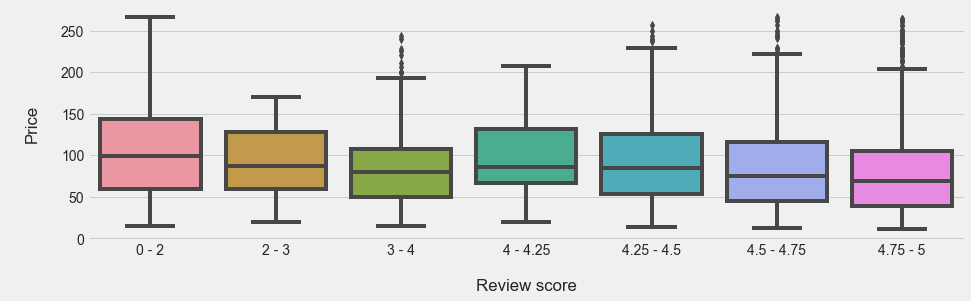

In [148]:
plt.figure(figsize=(14,4))
sns.boxplot(y='price',x='review_scores_accuracy_classed',data=df)
plt.xlabel('\nReview score')
plt.ylabel('\nPrice\n')
plt.show()

### amenities VS price

In [149]:
dataset[['amenities']].head(2)

,amenities
id,
157612,"[""Dedicated workspace"", ""Cooking basics"", ""Pri..."
283495,"[""Dedicated workspace"", ""Cable TV"", ""Breakfast..."


###### Let's check how many different amenities are offered in AirBNBs in Greater Manchester


In [153]:
import ast
results = Counter()


def converter(row):
    x = ast.literal_eval(row['amenities'])
    results.update(x)
    
    return(len(x))

dataset['amenities_number'] = dataset.apply(converter, axis=1)


list_all_amenities = list(results)
print(f'In the dataset we have {len(list_all_amenities)} diffrent types of amenities')

In the dataset we have 639 diffrent types of amenities


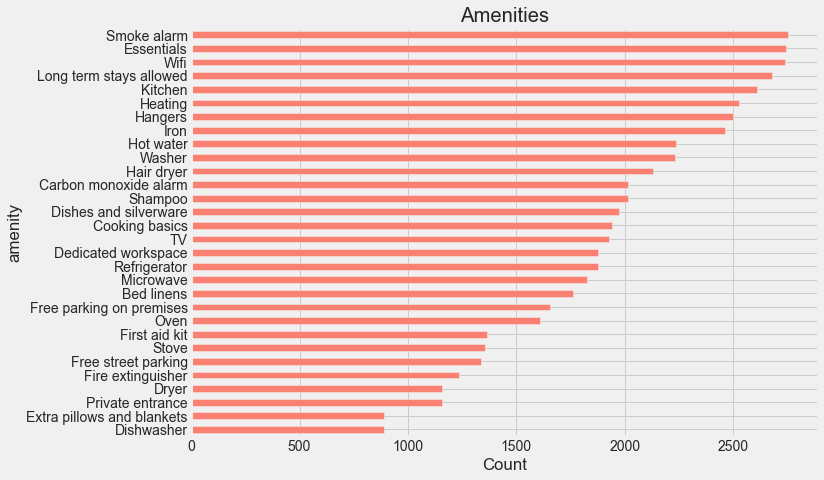

In [154]:
# create a new dataframe
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])
# plot the Top 30
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='salmon',
                                                      title='Amenities')
plt.xlabel('Count');

In [159]:
# checking how amenities_number & amenities for the same place by its id
print(dataset.at[310742,'amenities_number'])
dataset.at[310742,'amenities']

9


'["Wifi", "Kitchen", "Long term stays allowed", "Heating", "Essentials", "TV", "Elevator", "Gym", "Washer"]'

In [162]:
dataset['amenities_number'].describe()

count   2,966.00
mean       26.99
std        11.54
min         0.00
25%        18.00
50%        26.00
75%        35.00
max        66.00
Name: amenities_number, dtype: float64

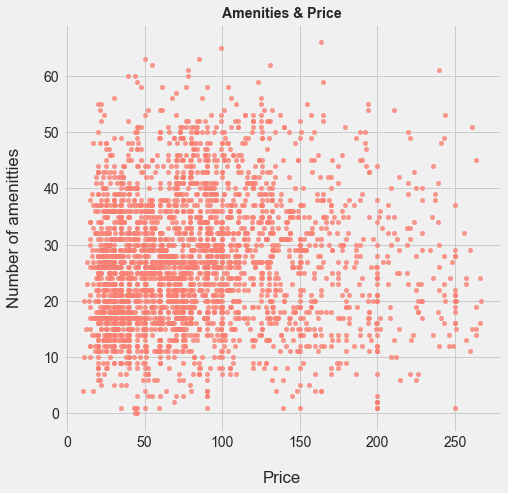

In [170]:
fig = plt.figure(figsize = (7, 7))
plt.scatter(x=dataset["price"], y=dataset["amenities_number"],  c=['#fa8072'],s=20,alpha=0.8)

plt.title('Amenities & Price', fontsize=14, fontweight='bold')
plt.xlabel('\nPrice')
plt.ylabel('Number of amenitties\n')
plt.show()